In [1]:
import pandas as pd
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

In [40]:
!pip3 install -U scikit-learn scipy matplotlib


In [3]:
train = pd.read_csv('../Documents/widsdatathon2024-challenge2/train.csv')
test = pd.read_csv('../Documents/widsdatathon2024-challenge2/test.csv')


In [4]:
train.head(5)

patient_id patient_race  payer_type patient_state  patient_zip3   Region  \
0      268700          NaN  COMMERCIAL            AR           724    South   
1      484983        White         NaN            IL           629  Midwest   
2      277055          NaN  COMMERCIAL            CA           925     West   
3      320055     Hispanic    MEDICAID            CA           900     West   
4      190386          NaN  COMMERCIAL            CA           934     West   

             Division  patient_age patient_gender    bmi  \
0  West South Central           39              F    NaN   
1  East North Central           55              F  35.36   
2             Pacific           59              F    NaN   
3             Pacific           59              F    NaN   
4             Pacific           71              F    NaN   

  breast_cancer_diagnosis_code  \
0                       C50912   
1                       C50412   
2                         1749   
3                       C50911   
4                         1748   

                        breast_cancer_diagnosis_desc  \
0  Malignant neoplasm of unspecified site of left...   
1  Malig neoplasm of upper-outer quadrant of left...   
2  Malignant neoplasm of breast (female), unspeci...   
3  Malignant neoplasm of unsp site of right femal...   
4  Malignant neoplasm of other specified sites of...   

  metastatic_cancer_diagnosis_code metastatic_first_novel_treatment  \
0                             C773                              NaN   
1                             C773                              NaN   
2                             C773                              NaN   
3                             C773                              NaN   
4                            C7951                              NaN   

  metastatic_first_novel_treatment_type  population  density  age_median  \
0                                   NaN     3924.87    82.63       42.58   
1                                   NaN     2745.39    51.79       43.54   
2                                   NaN    38343.18   700.34       36.28   
3                                   NaN    36054.12  5294.33       36.65   
4                                   NaN    13700.37   400.48       41.78   

   age_under_10  age_10_to_19  age_20s  age_30s  age_40s  age_50s  age_60s  \
0         11.61         13.03    10.87    11.80    12.29    13.22    13.47   
1         11.22         12.19    11.45    11.01    11.35    14.39    14.15   
2         13.27         15.66    13.49    13.45    12.40    11.58    10.47   
3          9.76         11.27    17.23    17.44    13.09    12.30     9.41   
4         10.03         16.43    12.97    11.29    10.09    11.56    13.28   

   age_70s  age_over_80   male  female  married  divorced  never_married  \
0    10.07         3.64  51.43   48.57    51.05     16.72          23.57   
1     9.17         5.05  49.32   50.68    49.48     15.42          26.93   
2     6.38         3.28  49.99   50.01    48.81     11.90          34.35   
3     5.67         3.82  50.51   49.49    33.48     11.30          50.46   
4     8.78         5.53  51.99   48.01    48.21     11.16          35.60   

   widowed  family_size  family_dual_income  income_household_median  \
0     8.66         3.01               43.99                 44483.35   
1     8.17         3.17               41.41                 51796.79   
2     4.95         3.80               52.89                 78696.87   
3     4.77         3.44               55.53                 69266.69   
4     5.01         3.09               51.88                 82314.64   

   income_household_under_5  income_household_5_to_10  \
0                      2.21                      3.97   
1                      3.67                      3.86   
2                      2.59                      1.81   
3                      6.32                      2.95   
4                      2.74                      1.21   

   income_household_10_to_15  income_ho

In [5]:
test.head(5)

patient_id patient_race  payer_type patient_state  patient_zip3 Region  \
0      730681          NaN  COMMERCIAL            LA           713  South   
1      334212        Black         NaN            NC           283  South   
2      571362          NaN  COMMERCIAL            TX           794  South   
3      907331          NaN  COMMERCIAL            TN           373  South   
4      208382        Asian         NaN            WA           980   West   

             Division  patient_age patient_gender    bmi  \
0  West South Central           55              F    NaN   
1      South Atlantic           60              F  40.00   
2  West South Central           54              F  32.33   
3  East South Central           63              F  27.07   
4             Pacific           62              F    NaN   

  breast_cancer_diagnosis_code  \
0                         1746   
1                       C50912   
2                         1742   
3                         1748   
4                       C50411   

                        breast_cancer_diagnosis_desc  \
0  Malignant neoplasm of axillary tail of female ...   
1  Malignant neoplasm of unspecified site of left...   
2  Malignant neoplasm of upper-inner quadrant of ...   
3  Malignant neoplasm of other specified sites of...   
4  Malig neoplm of upper-outer quadrant of right ...   

  metastatic_cancer_diagnosis_code metastatic_first_novel_treatment  \
0                            C7981                              NaN   
1                             C773                              NaN   
2                             C773                              NaN   
3                            C7951                              NaN   
4                             C787                              NaN   

  metastatic_first_novel_treatment_type  population  density  age_median  \
0                                   NaN     4639.07    72.66       41.50   
1                                   NaN    10875.30   217.91       39.64   
2                                   NaN    18716.73  1019.51       30.37   
3                                   NaN     7804.79   140.05       44.32   
4                                   NaN    28628.29  1091.83       39.68   

   age_under_10  age_10_to_19  age_20s  age_30s  age_40s  age_50s  age_60s  \
0         11.40         13.44    11.42    11.45    12.56    13.08    14.26   
1         11.23         13.72    15.01    12.02    11.58    11.77    12.77   
2         11.00         18.86    23.11    12.24     9.88     9.12     8.38   
3         10.19         12.66    11.70    10.53    12.13    14.91    13.68   
4         12.14         12.46    11.32    15.21    14.45    14.11    11.23   

   age_70s  age_over_80   male  female  married  divorced  never_married  \
0     7.71         4.73  50.02   49.98    42.37     14.70          34.76   
1     8.52         3.41  51.33   48.67    44.14     13.28          34.62   
2     4.78         2.62  50.29   49.71    35.99     12.76          46.65   
3     9.83         4.36  49.41   50.59    52.22     14.64          25.72   
4     5.84         3.23  49.97   50.03    57.10     10.60          28.20   

   widowed  family_size  family_dual_income  income_household_median  \
0     8.18         3.30               38.83                 40643.61   
1     7.96         3.33               42.57                 49924.38   
2     4.63         3.15               54.23                 48238.92   
3     7.42         2.99               45.75                 54683.40   
4     4.11         3.12               58.66                120277.10   

   income_household_under_5  income_household_5_to_10  \
0                      6.77                      5.02   
1                      4.59                      3.83   
2                      6.12                      4.73   
3                      3.32                      3.42   
4                      1.65                      1.17   

   income_household_10_to_15  income_household_15_t

In [6]:
# Count the number of rows
print(f"The total number of rows is {train.shape[0]}")

# List the column names
print(f"The total number of columns is {train.columns.shape[0]}")

# Get the number of rows
total_rows = len(train)

# Count non-null values in each column
num_values = train.notna().sum()

#Percentage of values per total rows
pct_not_null = round((train.notna().sum()/total_rows)*100,2)

# Combine results into a Series or DataFrame
result = pd.Series(num_values, index=train.columns)  # Series
result = pd.DataFrame({'Total Rows': total_rows, 'Non-Null Values': num_values, '% not null':pct_not_null})  # DataFrame
result

The total number of rows is 13173
The total number of columns is 152


Total Rows  Non-Null Values  % not null
patient_id                                  13173            13173      100.00
patient_race                                13173             6516       49.46
payer_type                                  13173            11408       86.60
patient_state                               13173            13173      100.00
patient_zip3                                13173            13173      100.00
Region                                      13173            13173      100.00
Division                                    13173            13173      100.00
patient_age                                 13173            13173      100.00
patient_gender                              13173            13173      100.00
bmi                                         13173             4102       31.14
breast_cancer_diagnosis_code                13173            13173      100.00
breast_cancer_diagnosis_desc                13173            13173      100.00
metastatic_cancer_diagnosis_code            13173            13173      100.00
metastatic_first_novel_treatment            13173               11        0.08
metastatic_first_novel_treatment_type       13173               11        0.08
population                                  13173            13173      100.00
density                                     13173            13173      100.00
age_median                                  13173            13173      100.00
age_under_10                                13173            13173      100.00
age_10_to_19                                13173            13173      100.00
age_20s                                     13173            13173      100.00
age_30s                                     13173            13173      100.00
age_40s                                     13173            13173      100.00
age_50s                                     13173            13173      100.00
age_60s                                     13173            13173      100.00
age_70s                                     13173            13173      100.00
age_over_80                                 13173            13173      100.00
male                                        13173            13173      100.00
female                                      13173            13173      100.00
married                                     13173            13173      100.00
divorced                                    13173            13173      100.00
never_married                               13173            13173      100.00
widowed                                     13173            13173      100.00
family_size                                 13173            13168       99.96
family_dual_income                          13173            13168       99.96
income_household_median                     13173            13168       99.96
income_household_under_5                    13173            13168       99.96
income_household_5_to_10                    13173            13168       99.96
income_household_10_to_15                   13173            13168       99.96
income_household_15_to_20                   13173            13168       99.96
income_household_20_to_25                   13173            13168       99.96
income_household_25_to_35                   13173            13168       99.96
income_household_35_to_50                   13173            13168       99.96
income_household_50_to_75                   13173            13168       99.96
income_household_75_to_100                  13173            13168       99.96
income_household_100_to_150                 13173            13168       99.96
income_household_150_over                   13173            13168       99.96
income_household_six_figure                 13173            13168       99.96
income_individual_median                    13173            13173      100.00
home_ownership                              13173            13168       99.96
housing_un

In [7]:
# Check for missing values in each column in train.
import pandas as pd
missing_values_per_column = train.isnull().sum()
missing_values_table = pd.DataFrame({'Column Name': train.columns, 'Missing Values': missing_values_per_column})
missing_values_table


Column Name  \
patient_id                                                        patient_id   
patient_race                                                    patient_race   
payer_type                                                        payer_type   
patient_state                                                  patient_state   
patient_zip3                                                    patient_zip3   
Region                                                                Region   
Division                                                            Division   
patient_age                                                      patient_age   
patient_gender                                                patient_gender   
bmi                                                                      bmi   
breast_cancer_diagnosis_code                    breast_cancer_diagnosis_code   
breast_cancer_diagnosis_desc                    breast_cancer_diagnosis_desc   
metastatic_cancer_diagnosis_code            metastatic_cancer_diagnosis_code   
metastatic_first_novel_treatment            metastatic_first_novel_treatment   
metastatic_first_novel_treatment_type  metastatic_first_novel_treatment_type   
population                                                        population   
density                                                              density   
age_median                                                        age_median   
age_under_10                                                    age_under_10   
age_10_to_19                                                    age_10_to_19   
age_20s                                                              age_20s   
age_30s                                                              age_30s   
age_40s                                                              age_40s   
age_50s                                                              age_50s   
age_60s                                                              age_60s   
age_70s                                                              age_70s   
age_over_80                                                      age_over_80   
male                                                                    male   
female                                                                female   
married                                                              married   
divorced                                                            divorced   
never_married                                                  never_married   
widowed                                                              widowed   
family_size                                                      family_size   
family_dual_income                                        family_dual_income   
income_household_median                              income_household_median   
income_household_under_5                            income_household_under_5   
income_household_5_to_10                            income_household_5_to_10   
income_household_10_to_15                          income_household_10_to_15   
income_household_15_to_20                          income_household_15_to_20   
income_household_20_to_25                          income_household_20_to_25   
income_household_25_to_35                          income_household_25_to_35   
income_household_35_to_50                          income_household_35_to_50   
income_household_50_to_75                          income_household_50_to_75   
income_household_75_to_100                        income_household_75_to_100   
income_household_100_to_150                      income_household_100_to_150   
income_household_150_over                          income_household_150_over   
income_household_six_figure                      income_household_six_figure   
income_individual_median                            income_individual_median   
home_ownership                                                hom

In [15]:
#Identify the type of columns - numerical/categorical

import numpy as np

# Identify numerical columns
numerical_features = train.select_dtypes(include=np.number).columns.tolist()

# Identify categorical columns
categorical_features = train.select_dtypes(include='object').columns.tolist()

# Print the results
print("Numerical columns:", numerical_features)
print("Categorical columns:", categorical_features)


Numerical columns: ['patient_id', 'patient_zip3', 'patient_age', 'bmi', 'population', 'density', 'age_median', 'age_under_10', 'age_10_to_19', 'age_20s', 'age_30s', 'age_40s', 'age_50s', 'age_60s', 'age_70s', 'age_over_80', 'male', 'female', 'married', 'divorced', 'never_married', 'widowed', 'family_size', 'family_dual_income', 'income_household_median', 'income_household_under_5', 'income_household_5_to_10', 'income_household_10_to_15', 'income_household_15_to_20', 'income_household_20_to_25', 'income_household_25_to_35', 'income_household_35_to_50', 'income_household_50_to_75', 'income_household_75_to_100', 'income_household_100_to_150', 'income_household_150_over', 'income_household_six_figure', 'income_individual_median', 'home_ownership', 'housing_units', 'home_value', 'rent_median', 'rent_burden', 'education_less_highschool', 'education_highschool', 'education_some_college', 'education_bachelors', 'education_graduate', 'education_college_or_above', 'education_stem_degree', 'labor

In [16]:
# **Frequency counts:** Analyze the frequency distribution of categorical features from the train dataset

# Get the categorical columns
categorical_features = train.select_dtypes(include='object').columns.tolist()

# Analyze the frequency distribution of each categorical feature
for col in categorical_features:
  print(f"\nFrequency distribution of '{col}':")
  print(train[col].value_counts())



Frequency distribution of 'patient_race':
patient_race
White       3565
Black       1159
Hispanic     807
Other        612
Asian        373
Name: count, dtype: int64

Frequency distribution of 'payer_type':
payer_type
COMMERCIAL            6297
MEDICAID              2593
MEDICARE ADVANTAGE    2518
Name: count, dtype: int64

Frequency distribution of 'patient_state':
patient_state
CA    2377
NY    1189
TX    1139
IL     871
MI     854
OH     750
FL     587
GA     562
PA     532
VA     370
MN     366
CO     364
IN     315
KY     282
AZ     243
WI     220
NC     202
WA     197
MO     167
LA     148
NM     139
OK     130
SC     119
TN     119
ID     113
OR      93
IA      88
AR      81
NV      70
KS      65
MD      64
MT      63
MS      63
NE      52
UT      31
AL      30
WV      30
HI      24
DE      19
DC      15
SD      14
AK       7
WY       5
ND       4
Name: count, dtype: int64

Frequency distribution of 'Region':
Region
South        3960
Midwest      3766
West         3726
Northeas

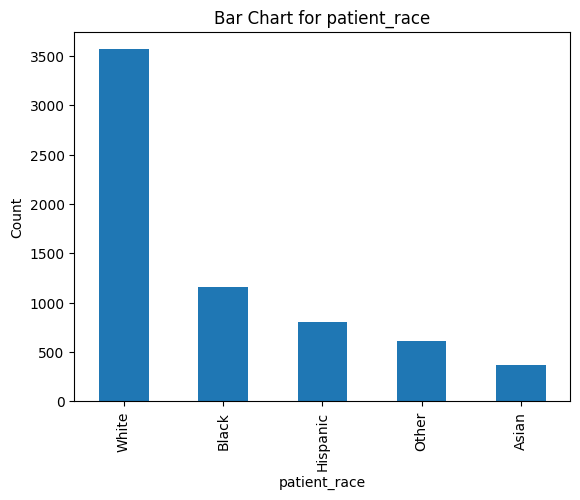

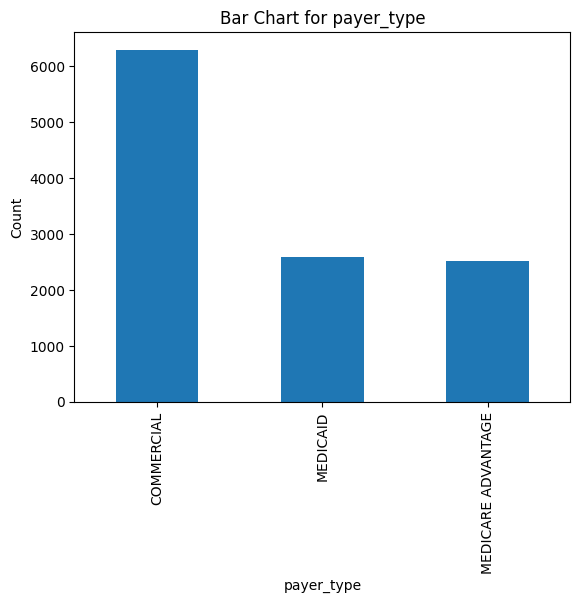

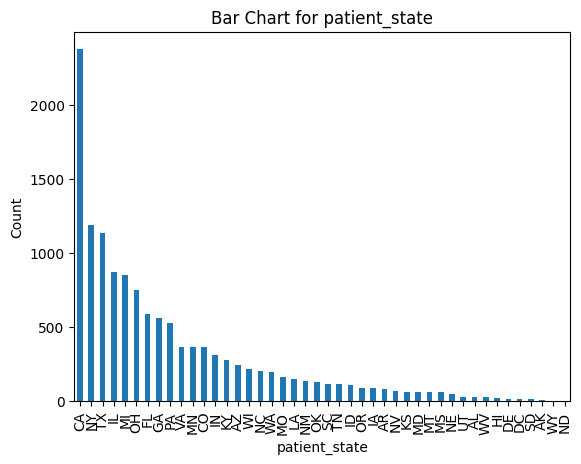

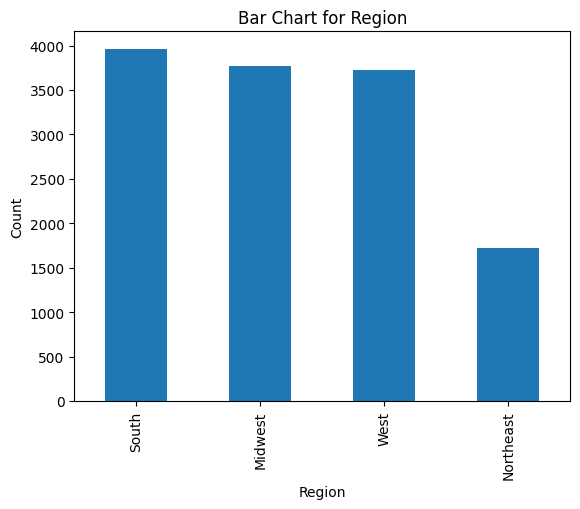

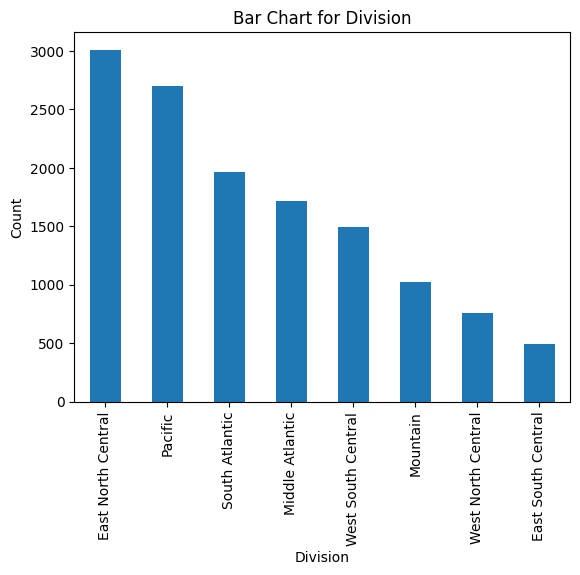

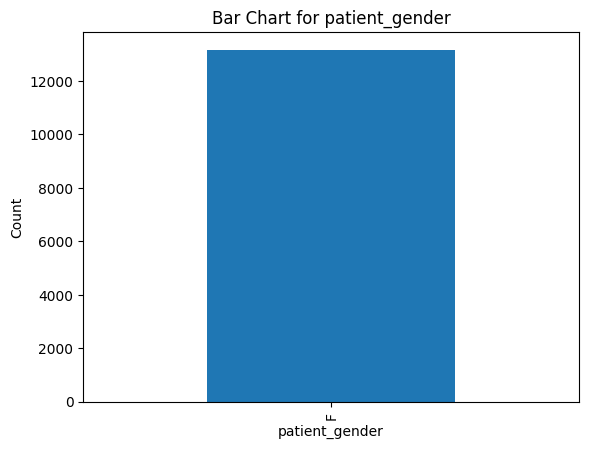

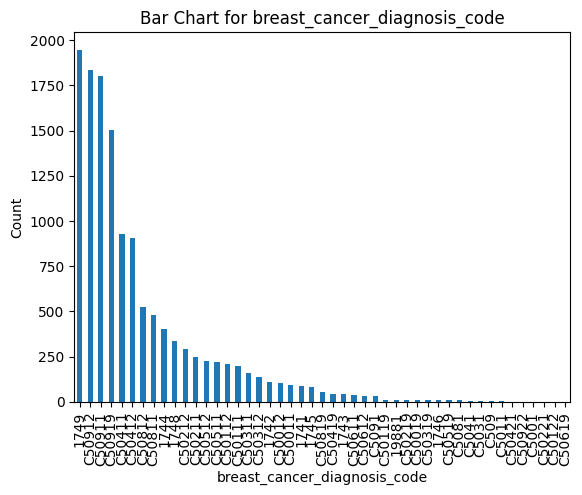

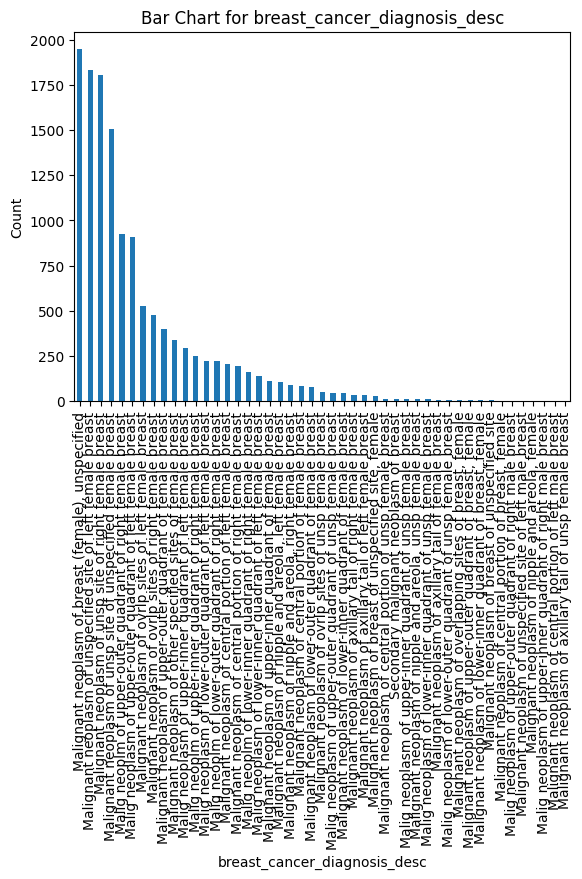

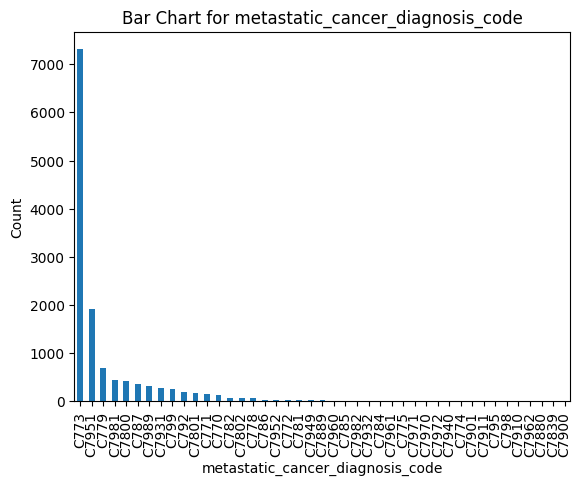

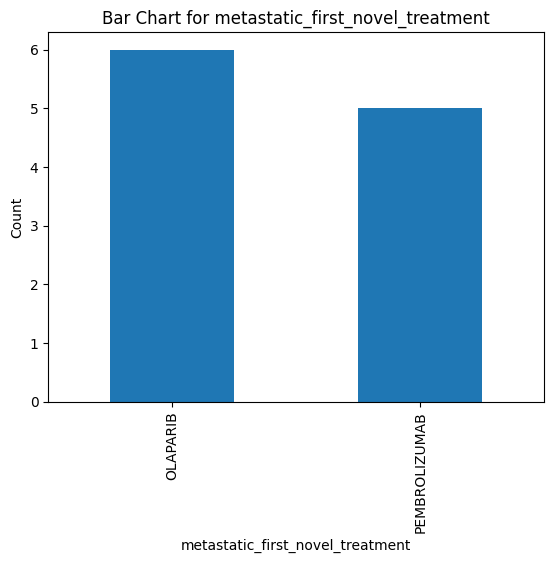

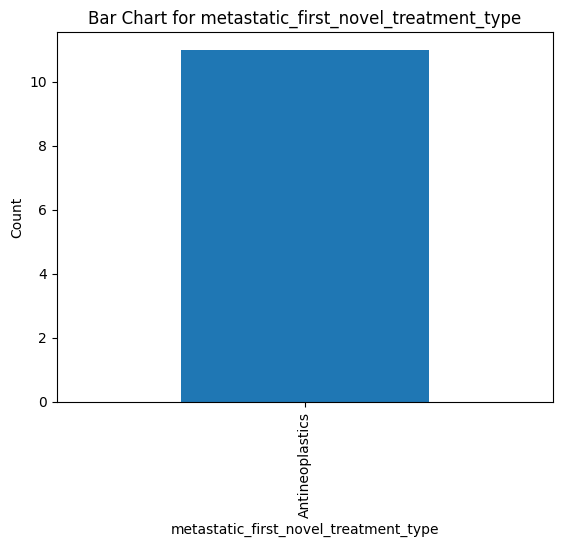

In [38]:
#Charts for categorical features
import matplotlib.pyplot as plt

categorical_columns = train.select_dtypes(include=["object"]).columns

for column in categorical_columns:
  plt.figure()
  train[column].value_counts().plot(kind="bar")
  plt.title(f"Bar Chart for {column}")
  plt.xlabel(column)
  plt.ylabel("Count")
  plt.show()

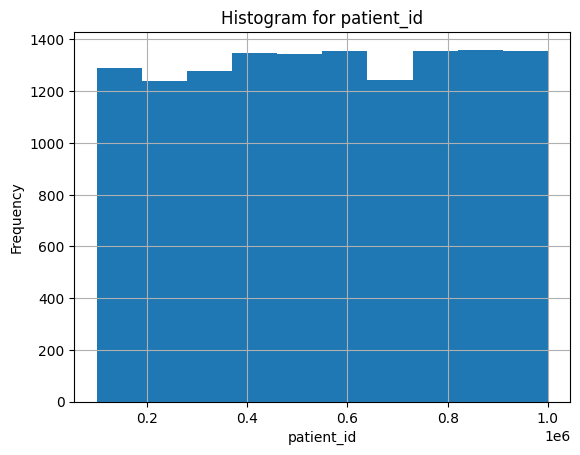

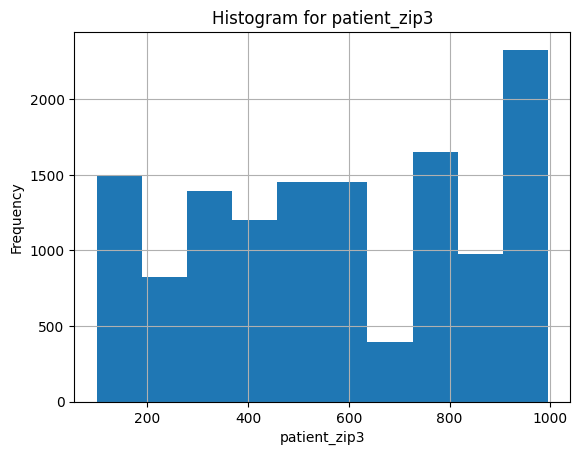

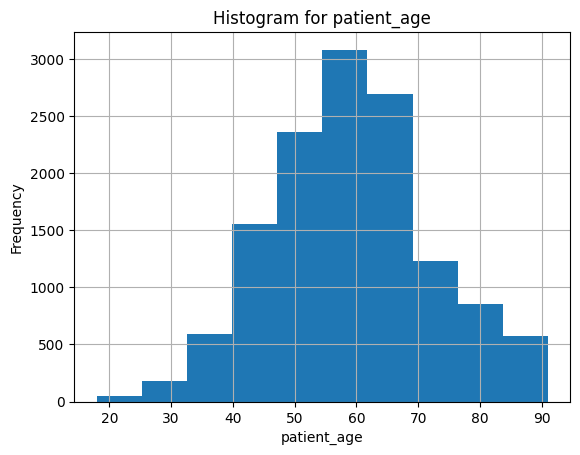

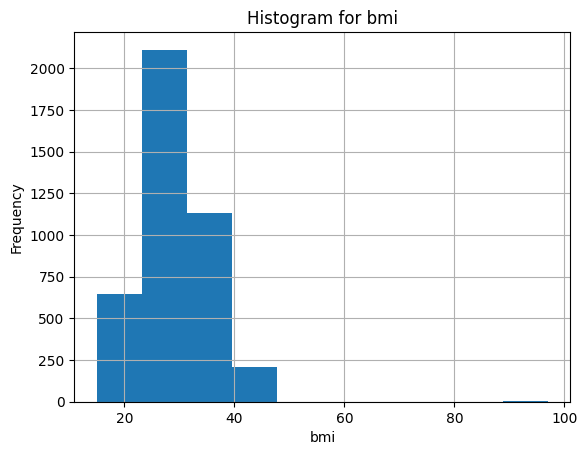

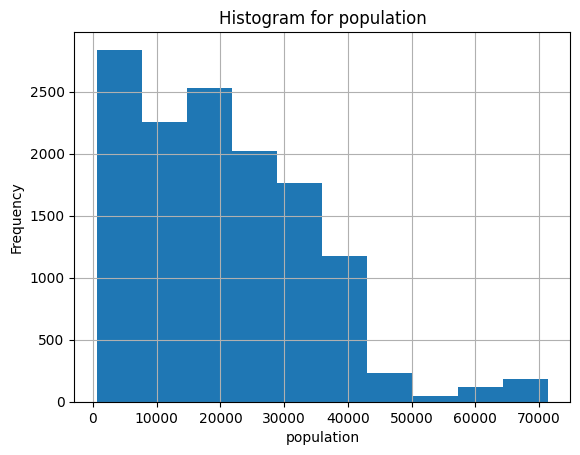

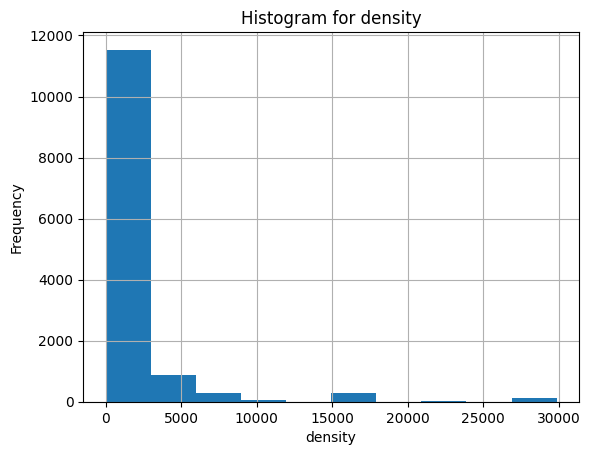

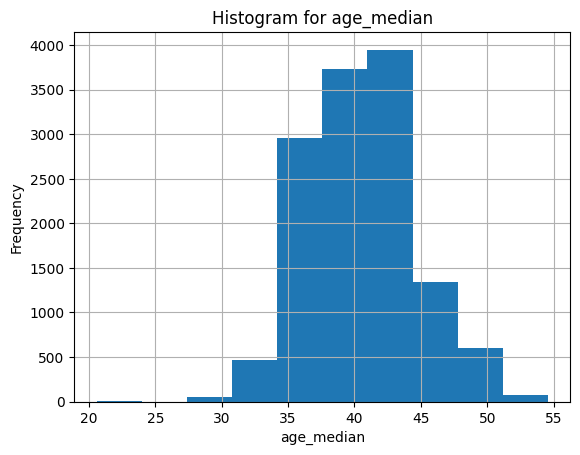

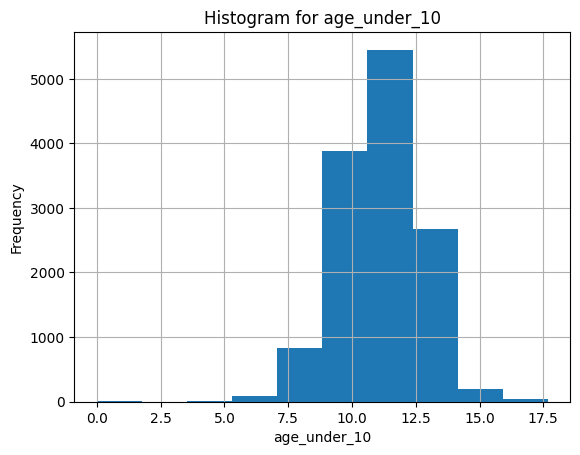

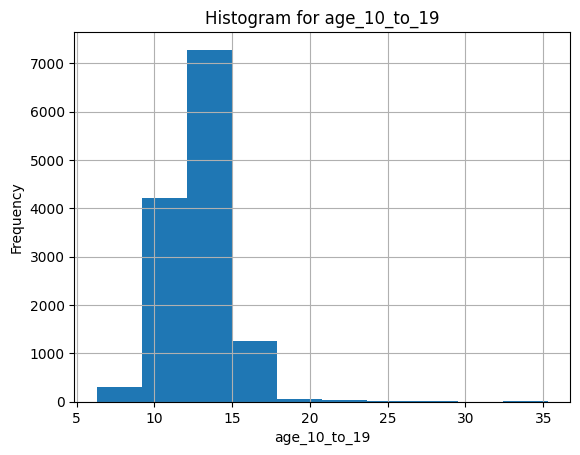

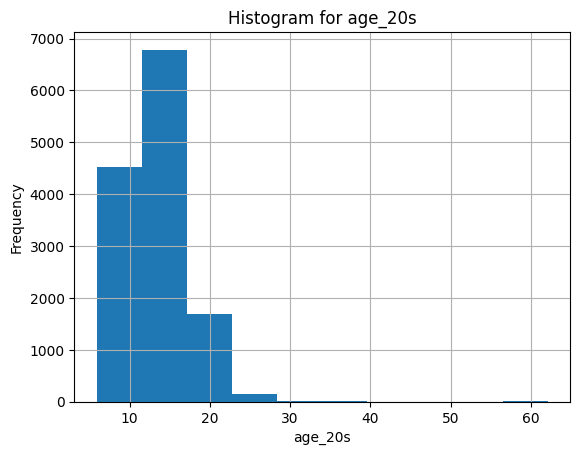

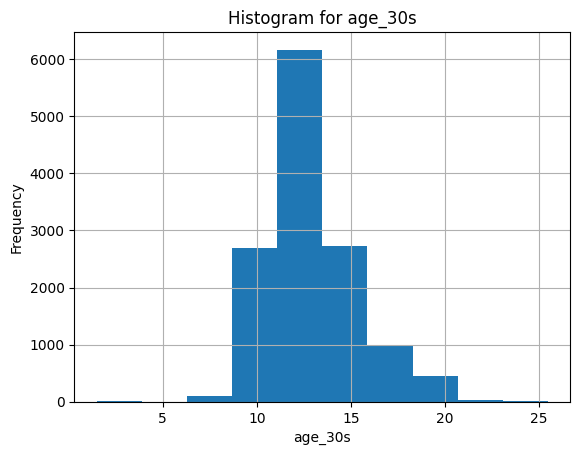

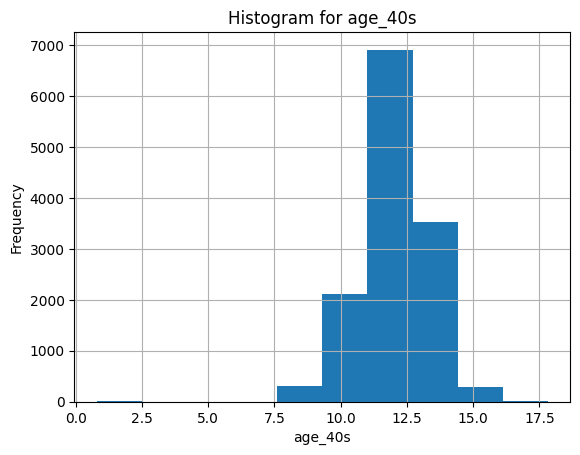

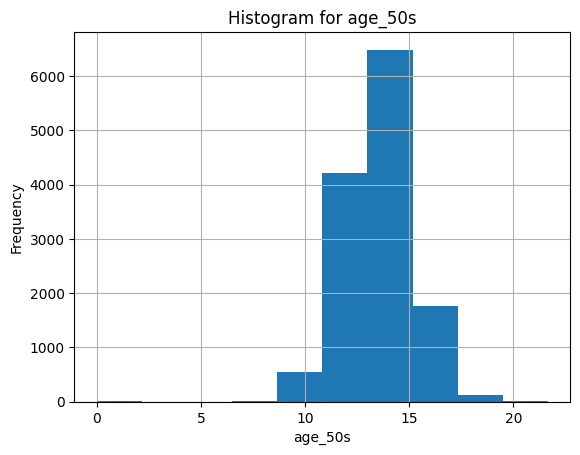

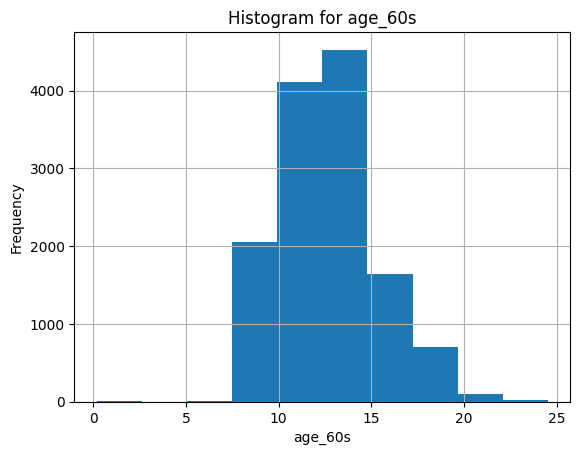

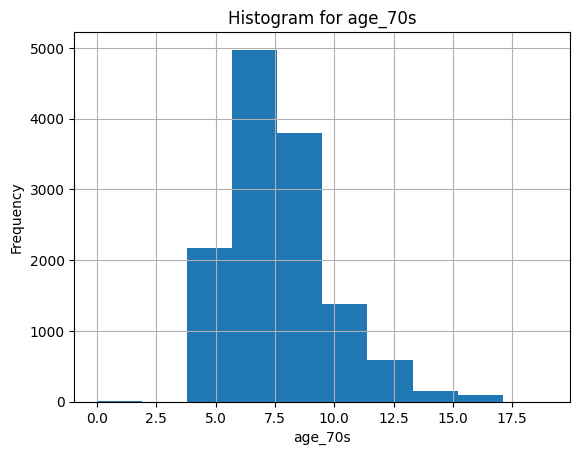

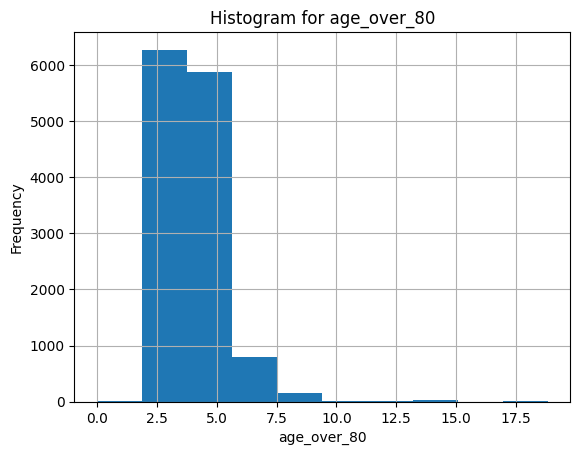

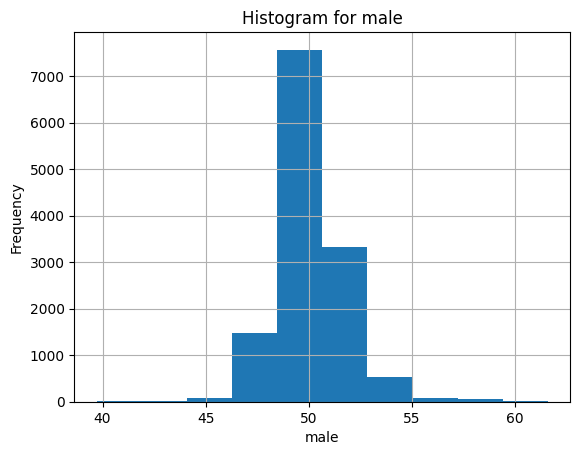

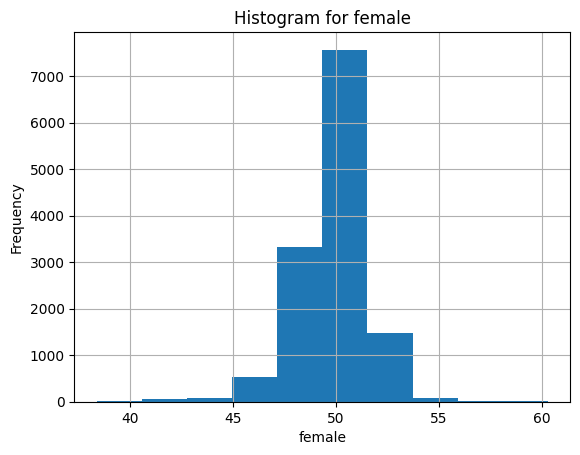

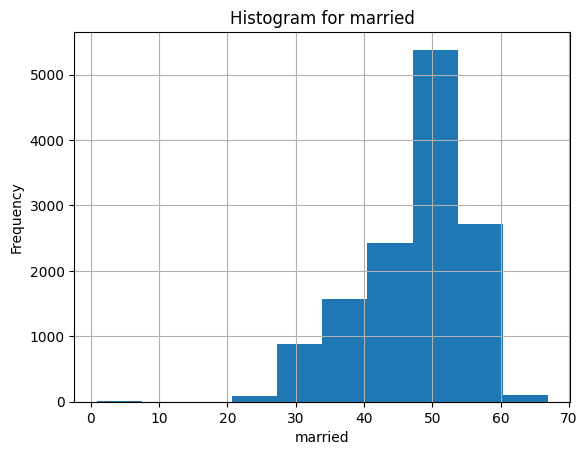

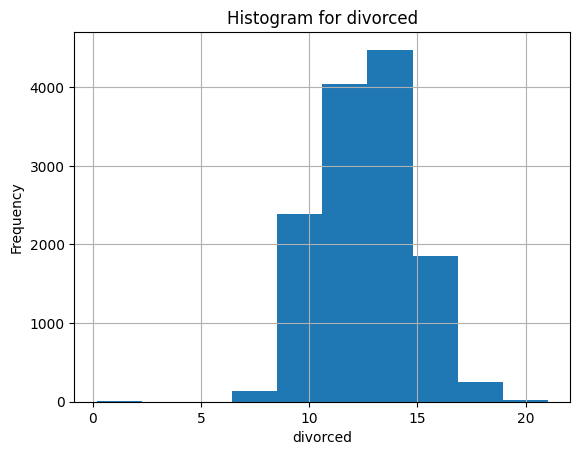

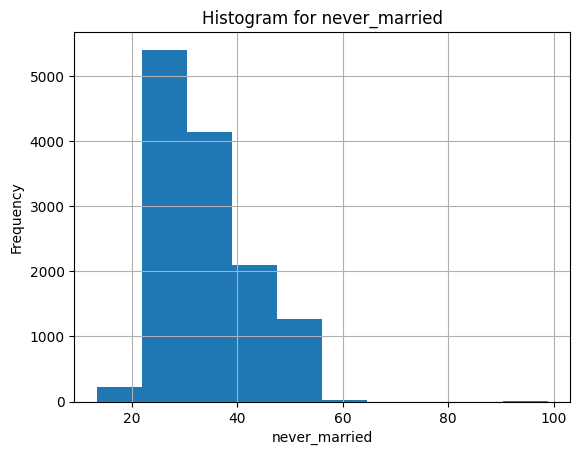

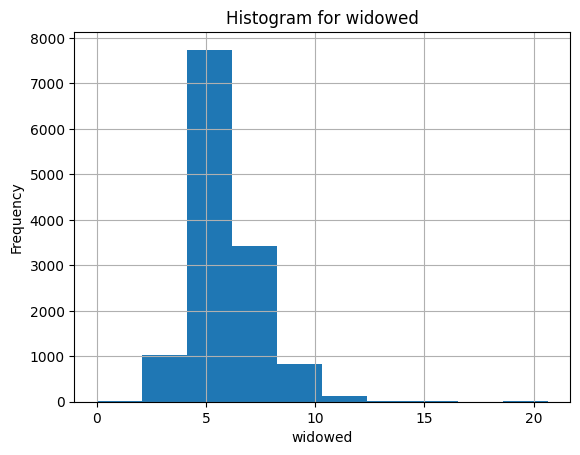

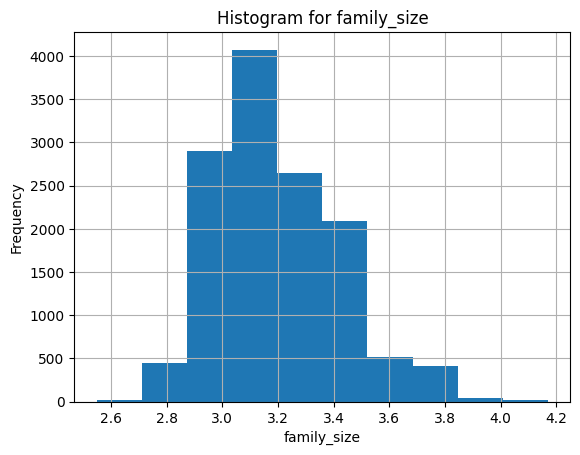

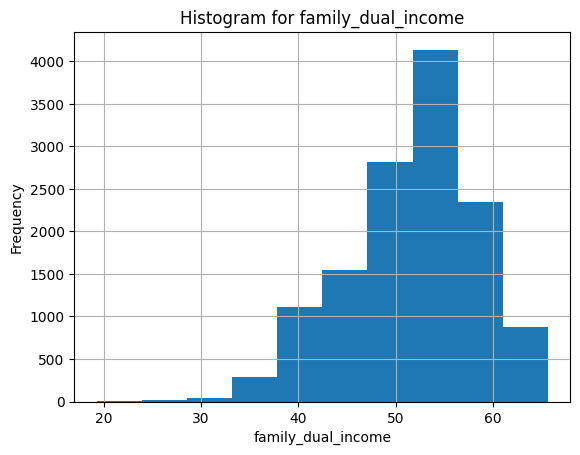

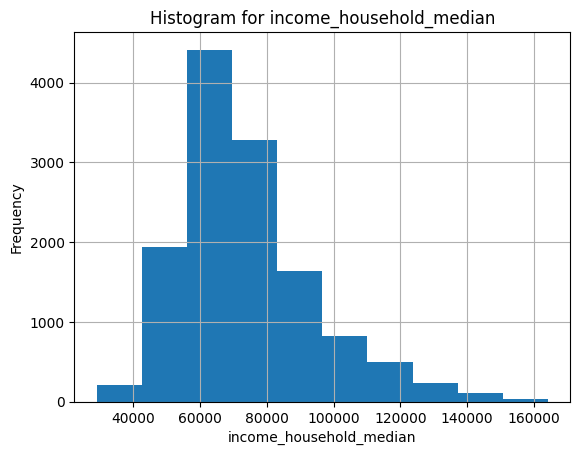

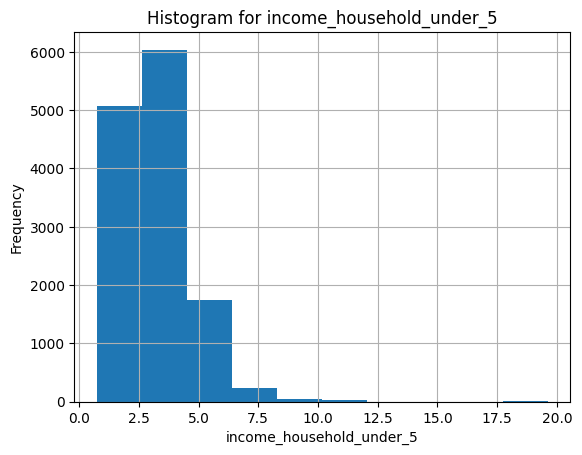

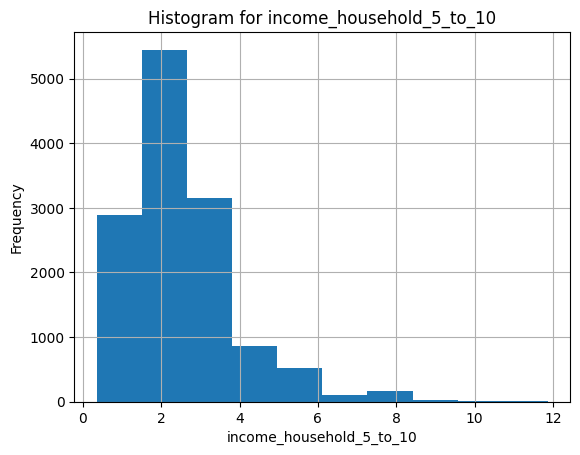

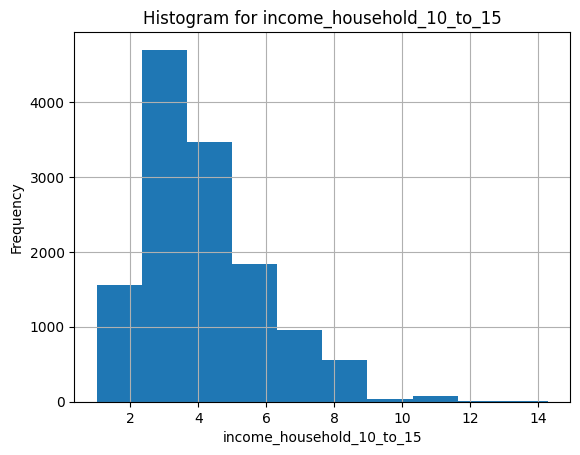

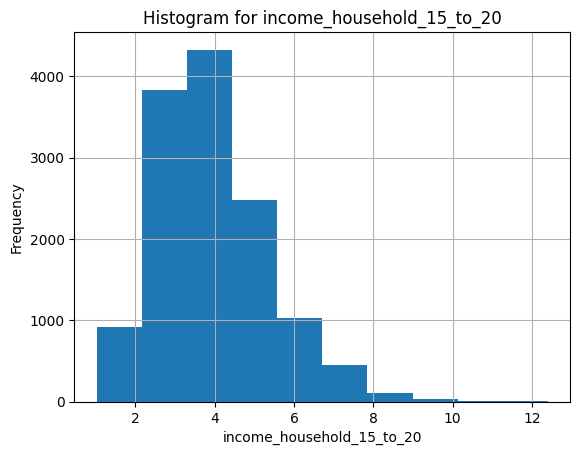

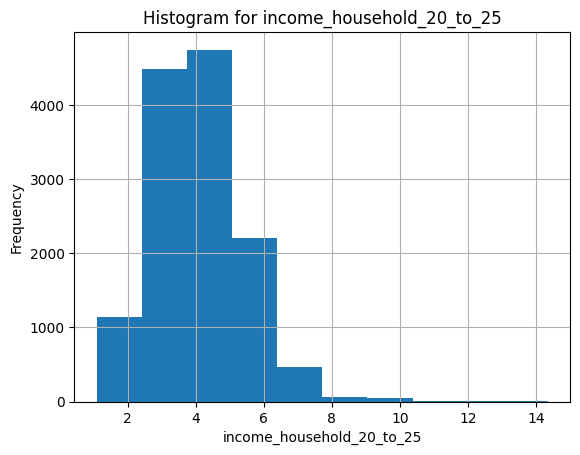

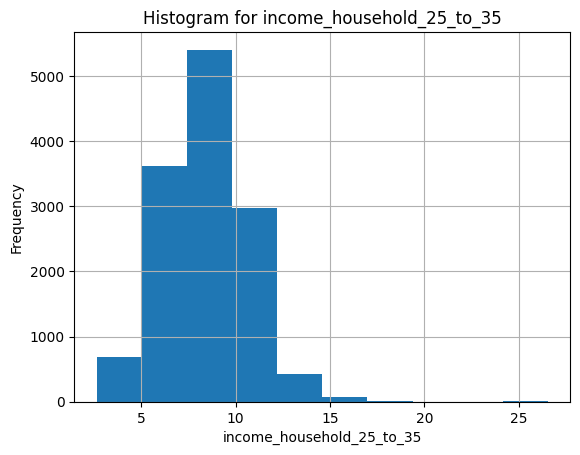

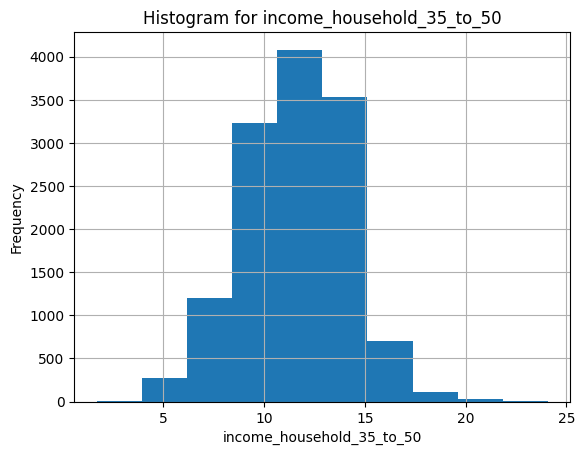

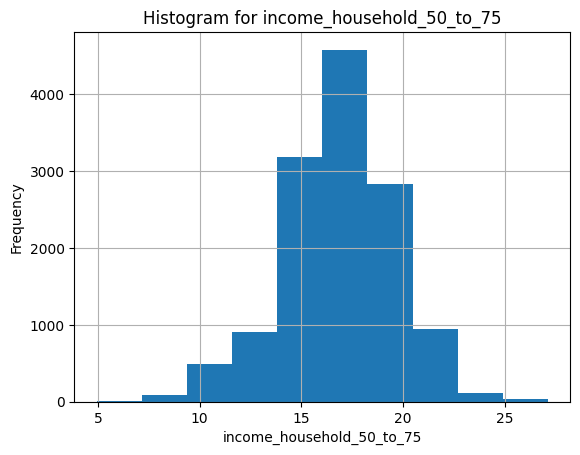

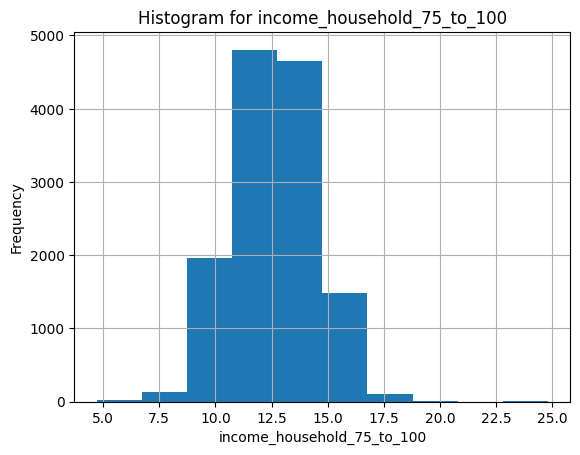

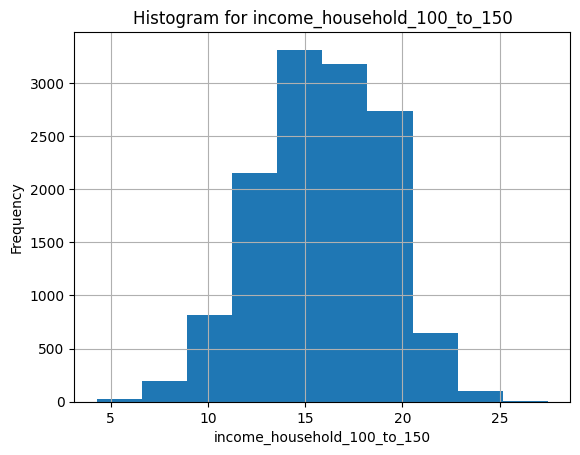

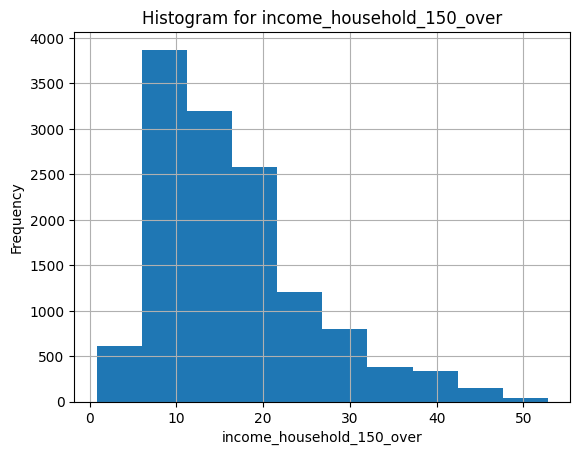

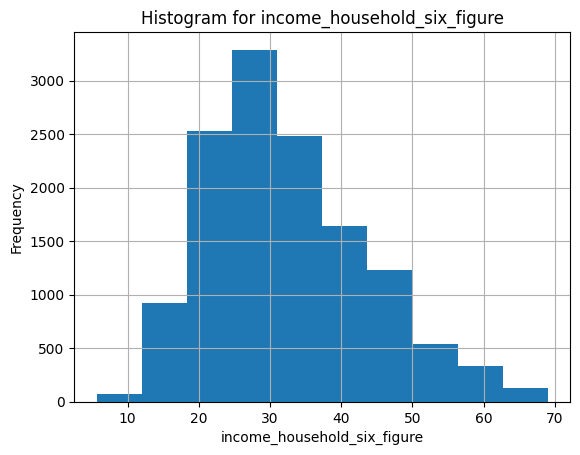

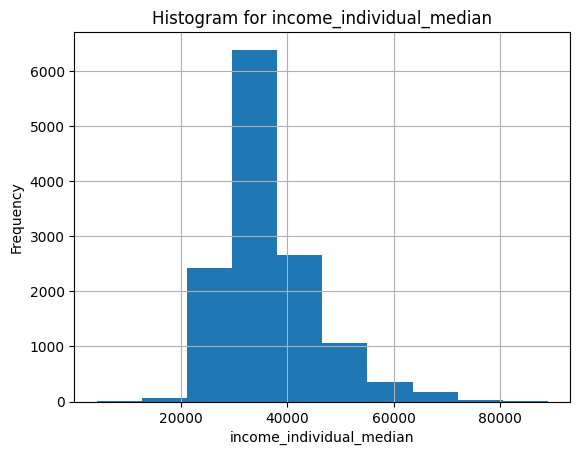

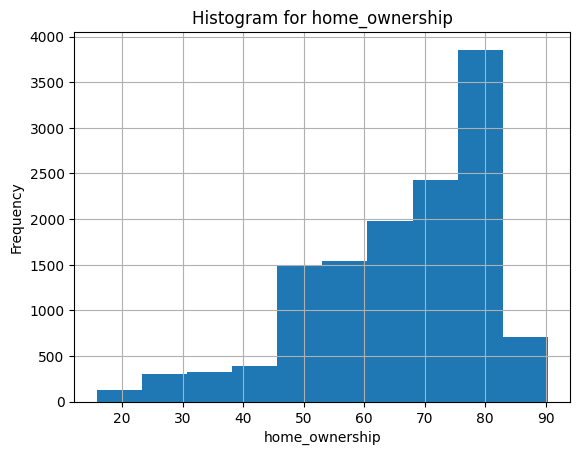

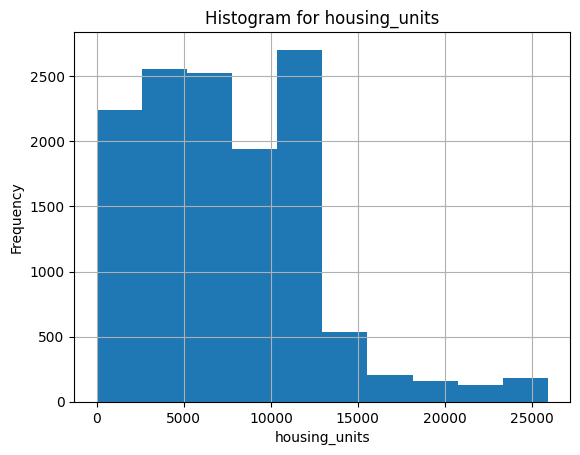

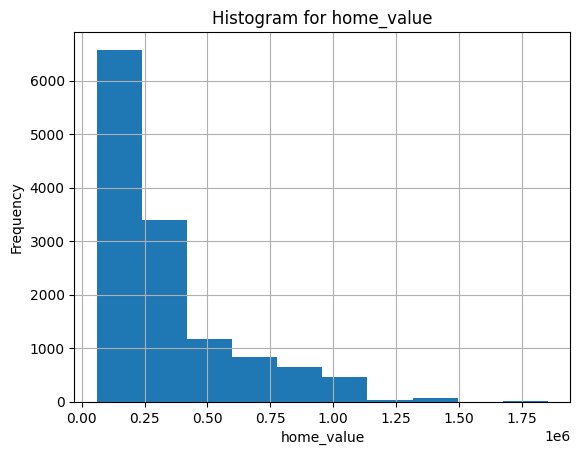

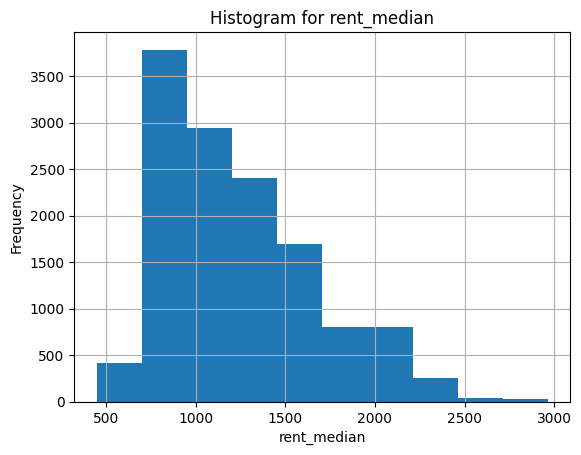

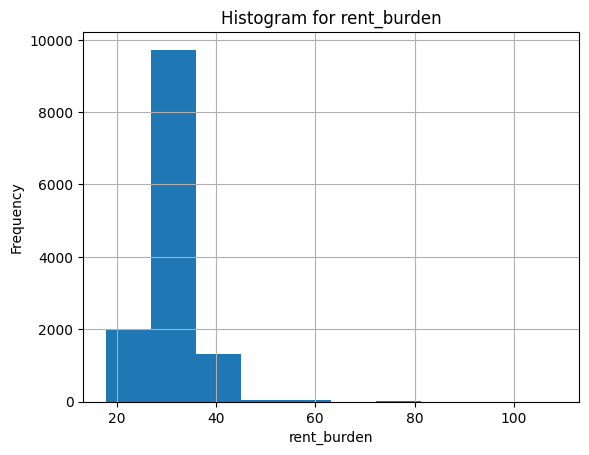

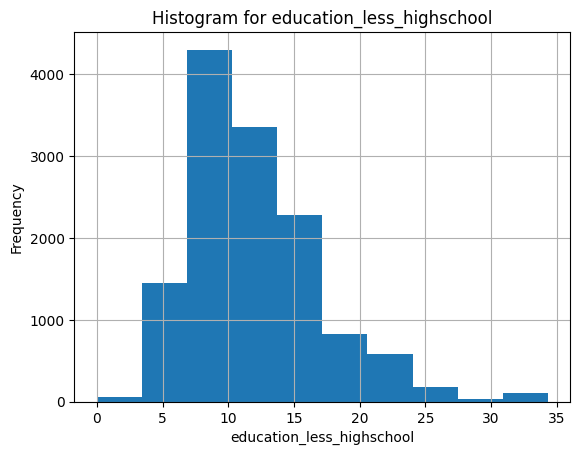

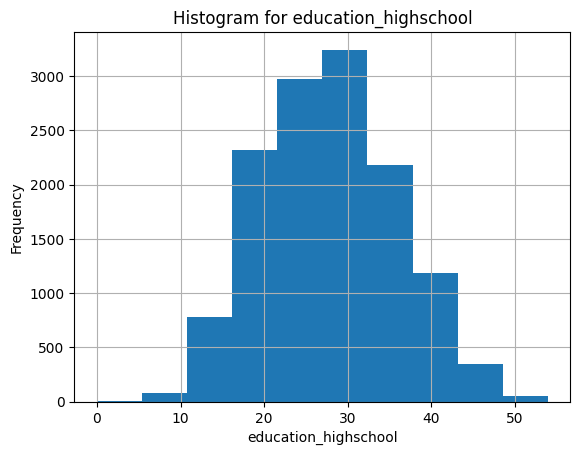

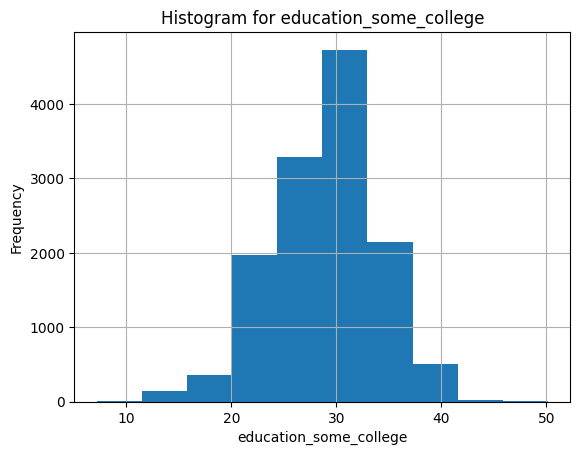

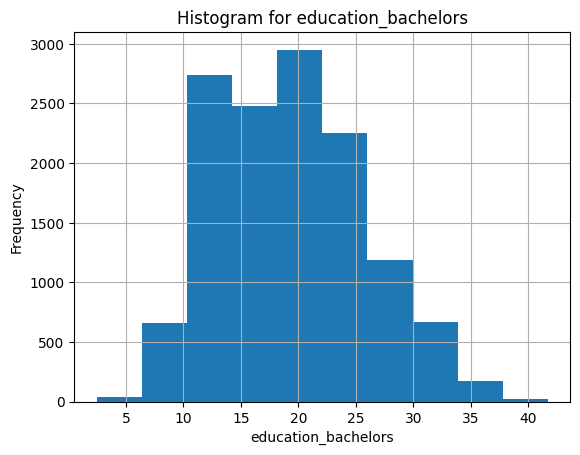

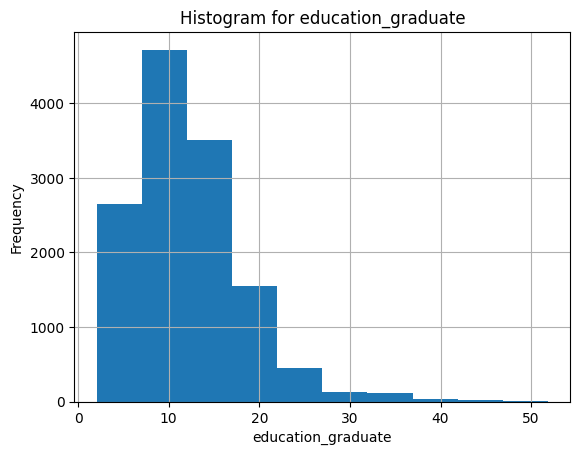

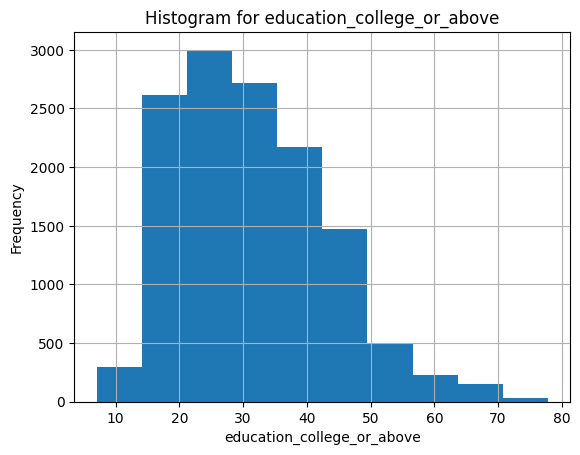

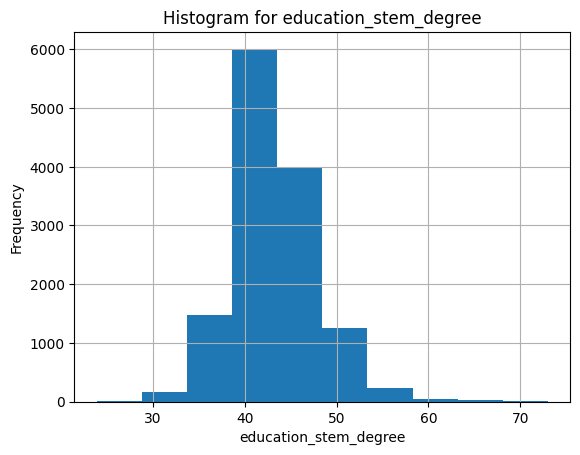

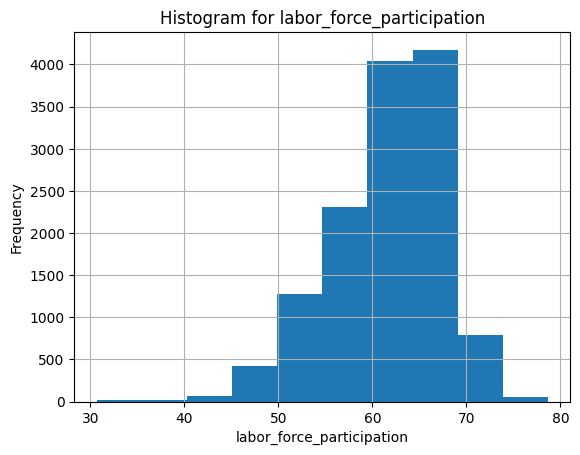

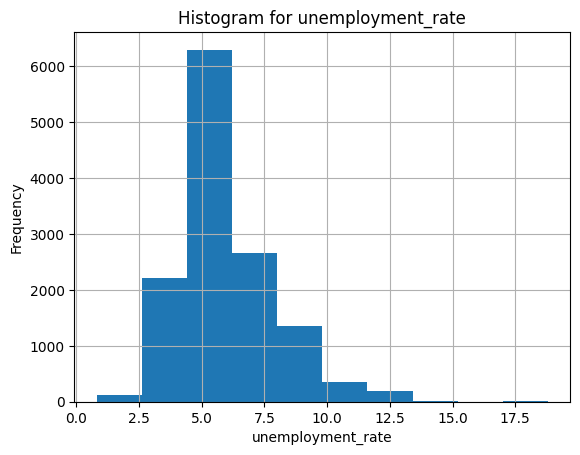

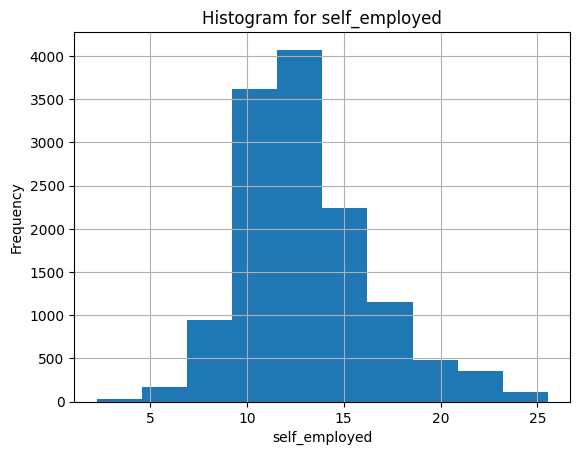

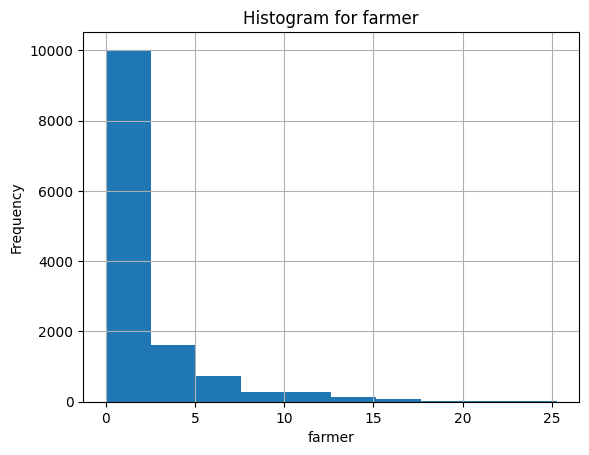

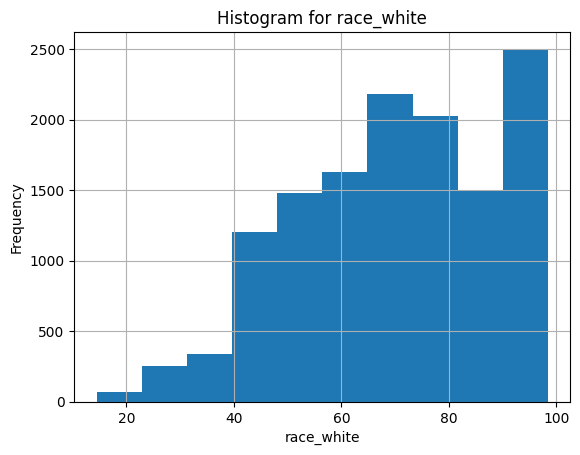

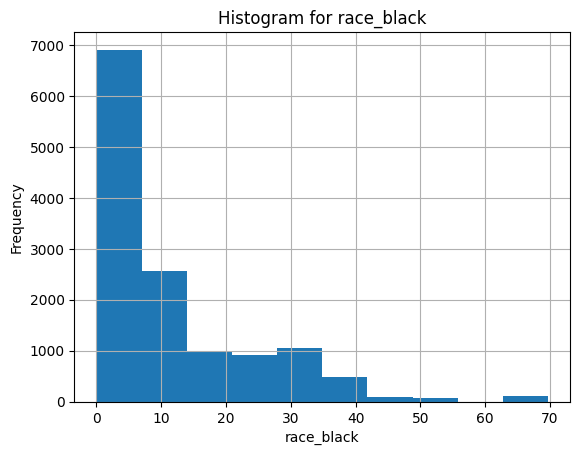

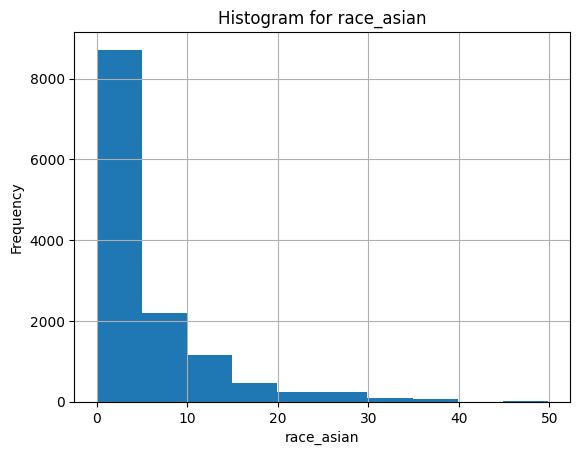

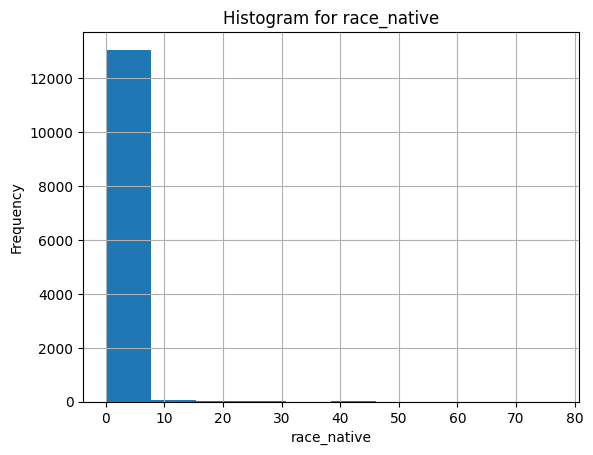

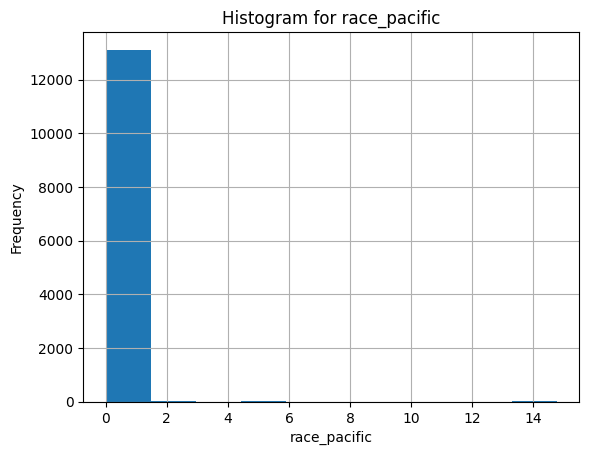

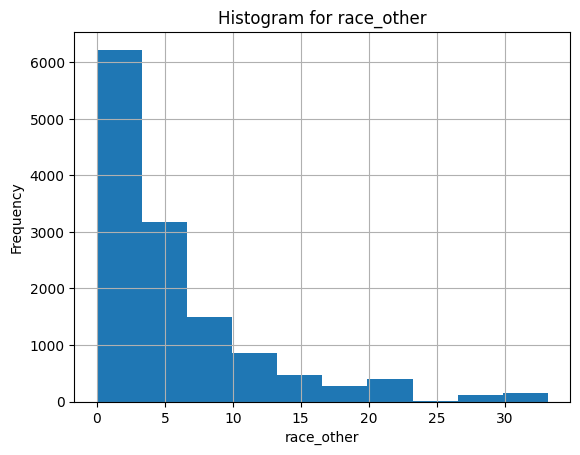

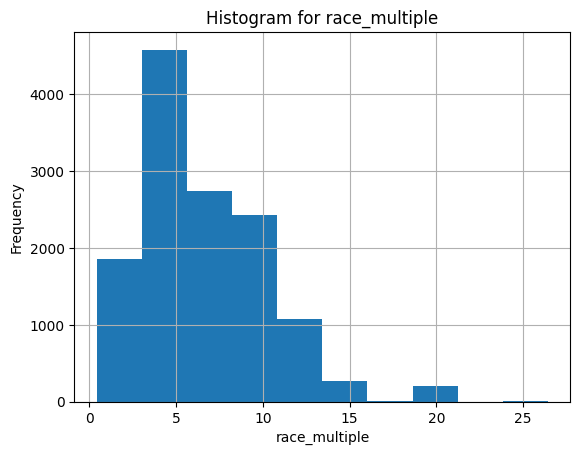

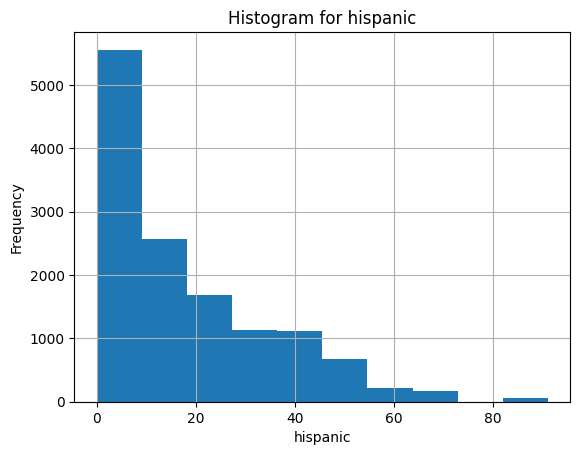

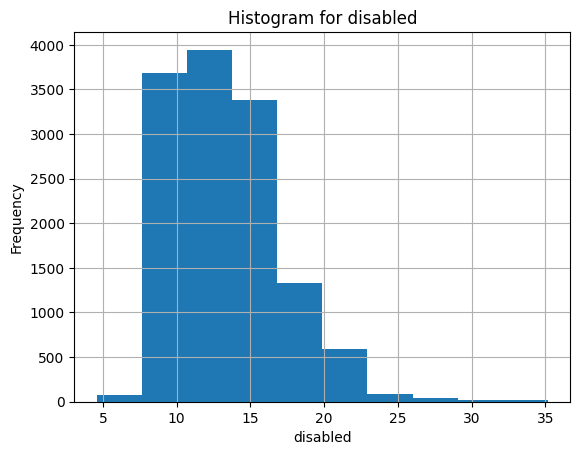

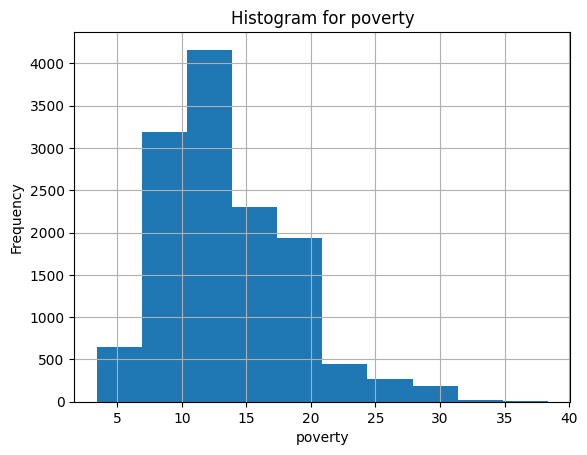

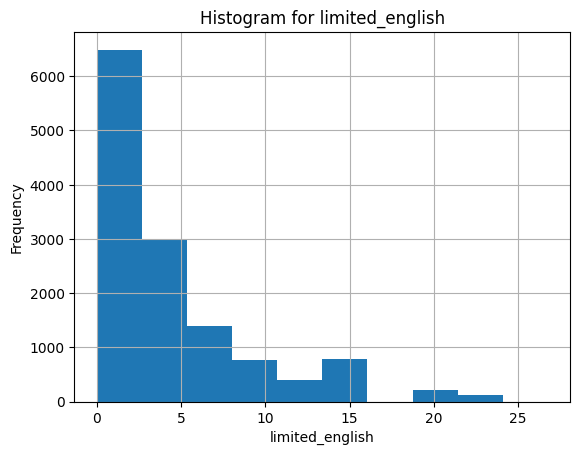

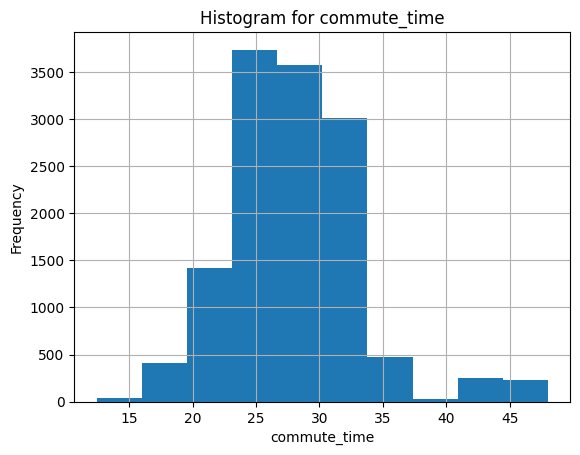

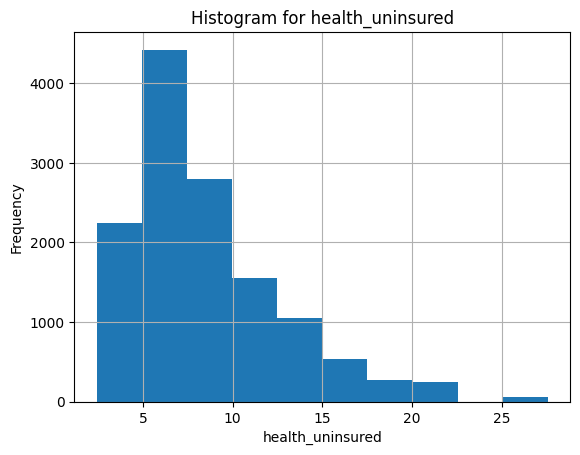

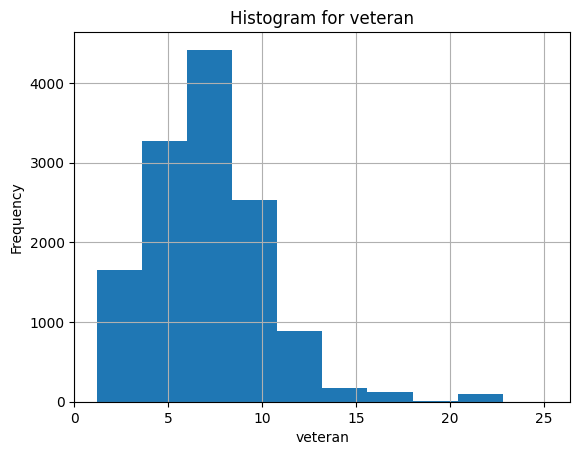

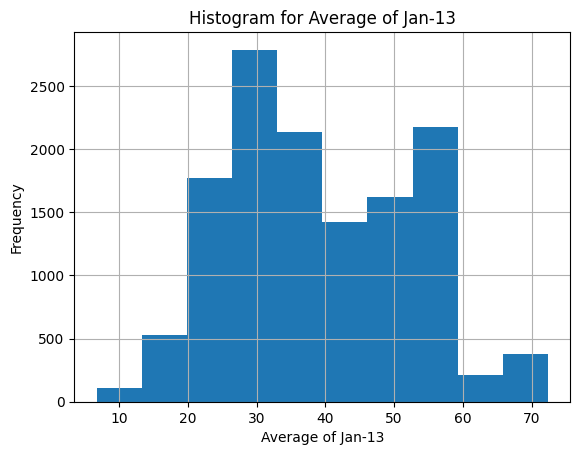

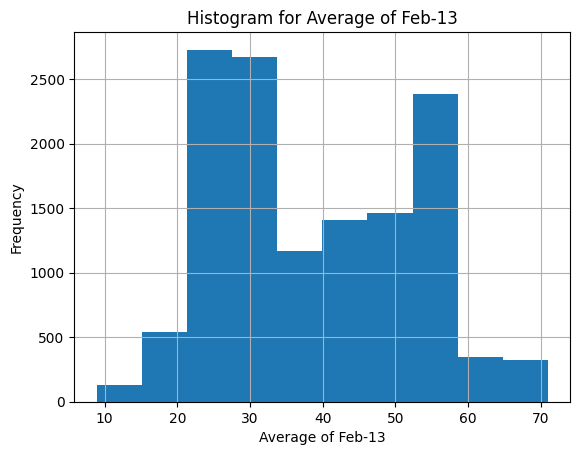

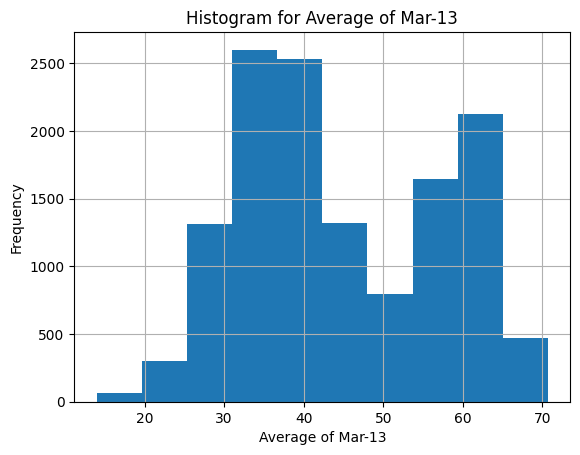

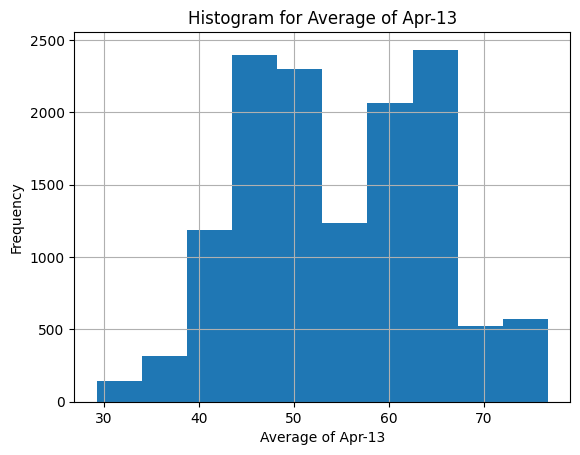

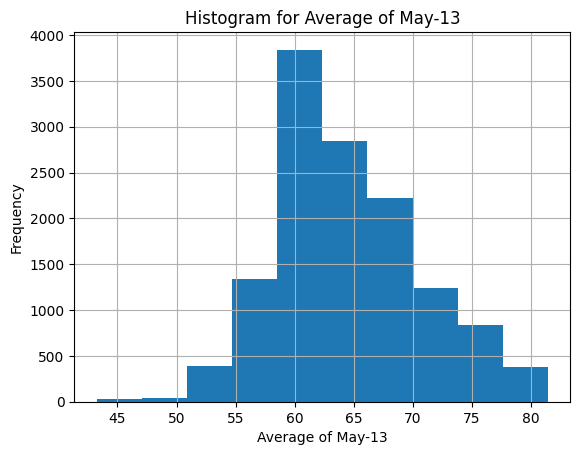

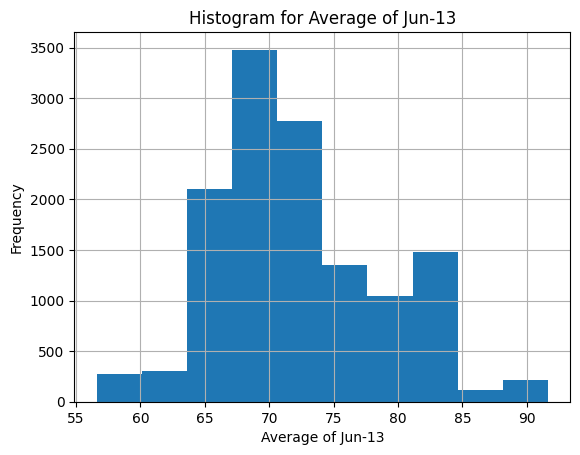

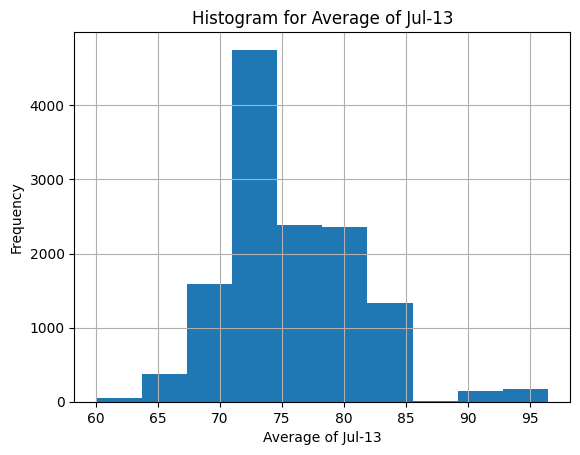

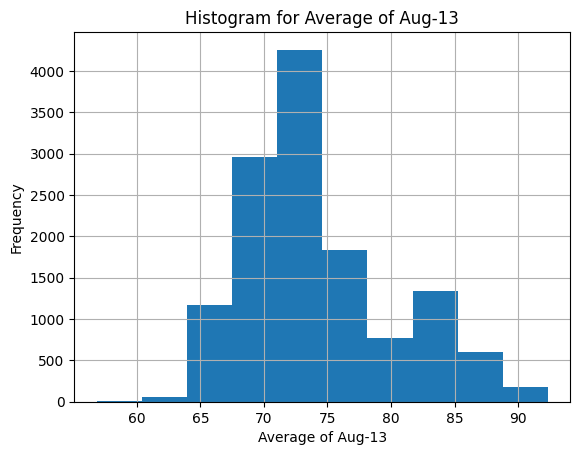

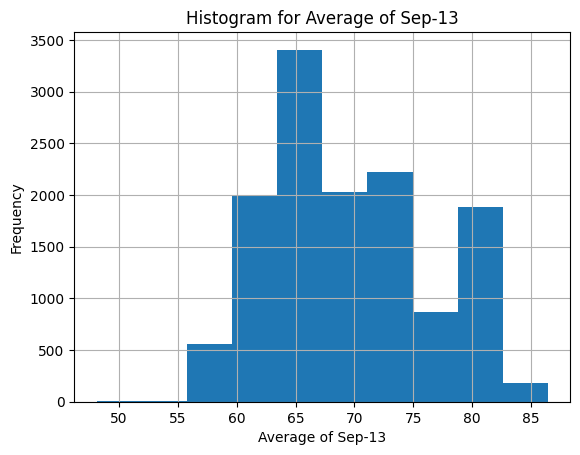

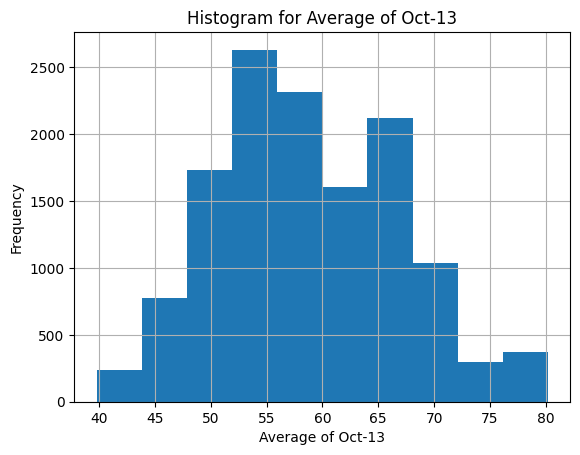

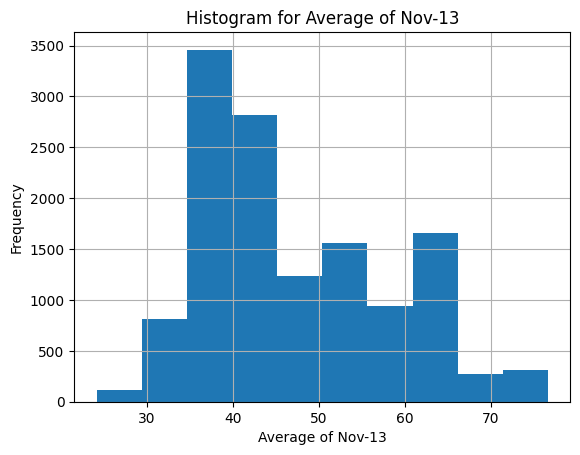

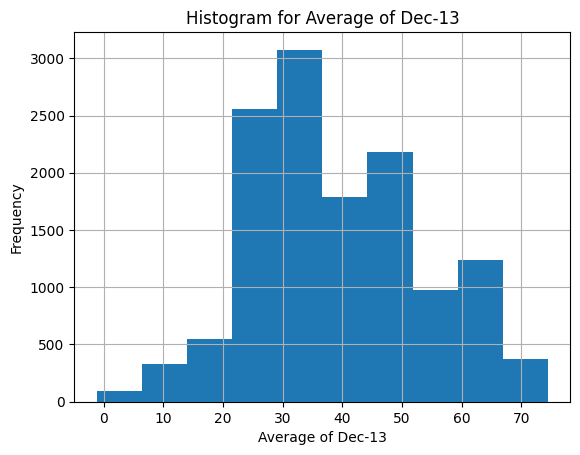

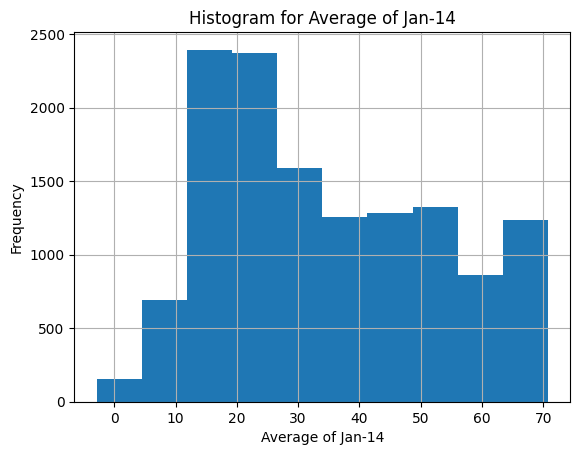

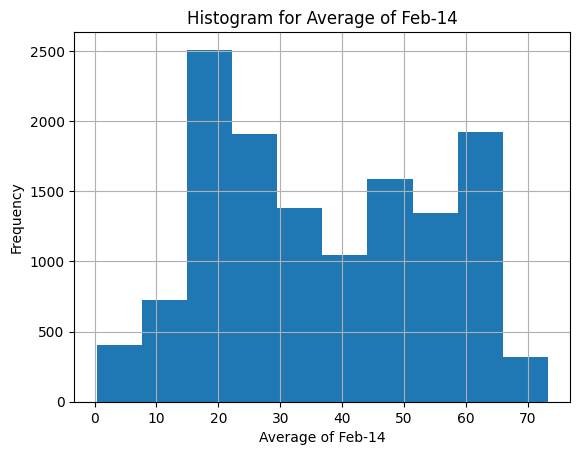

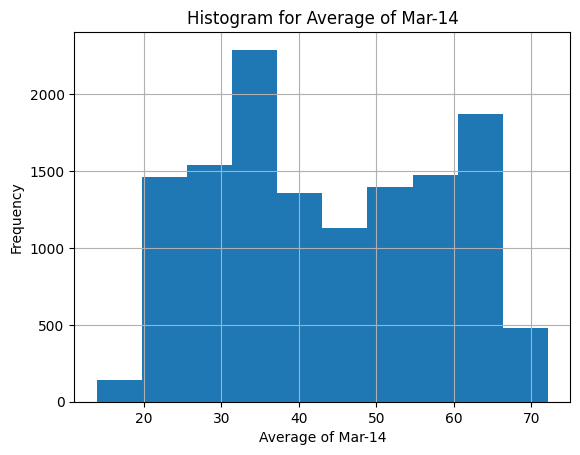

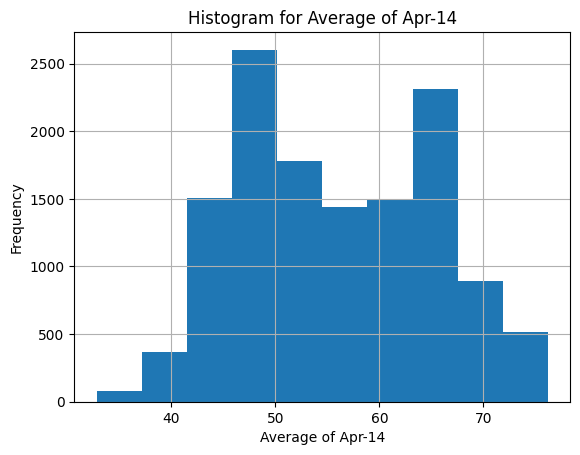

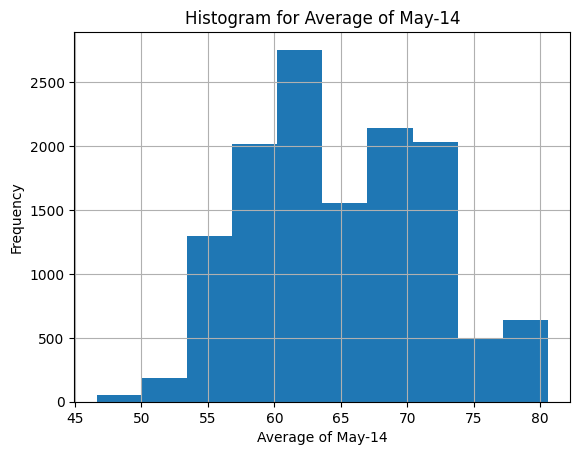

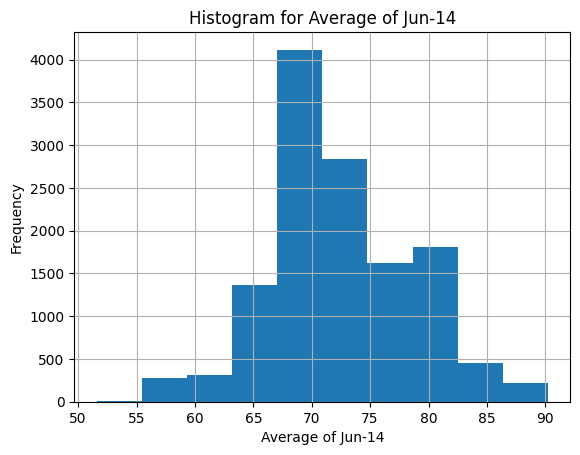

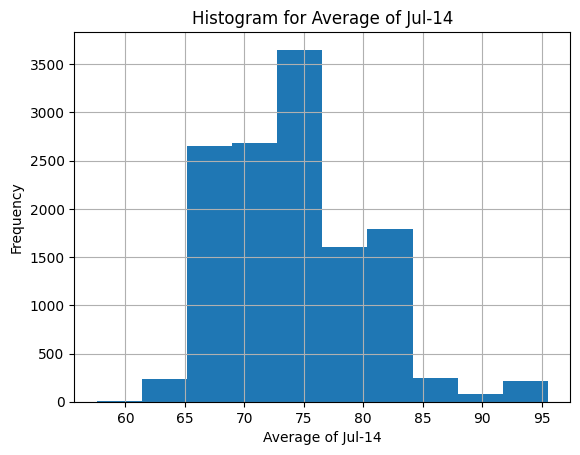

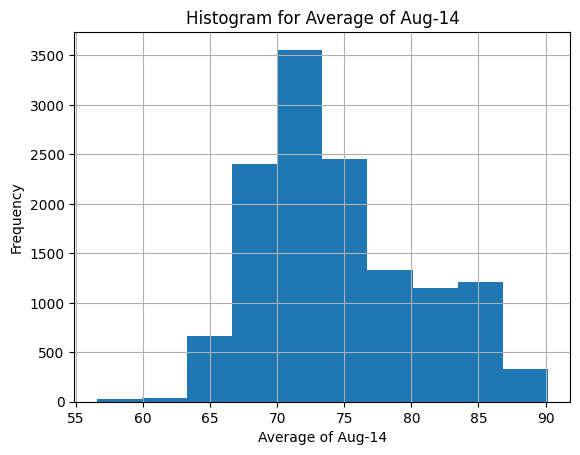

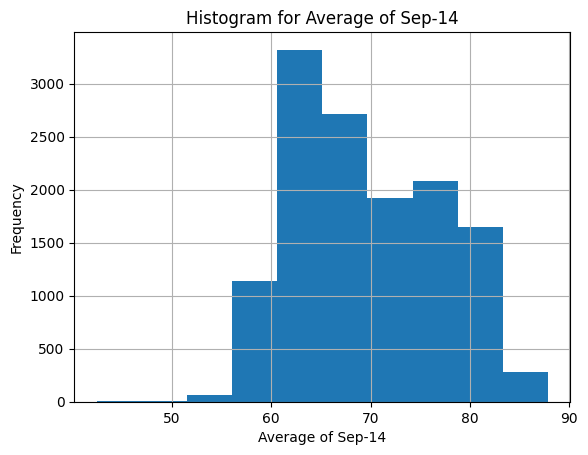

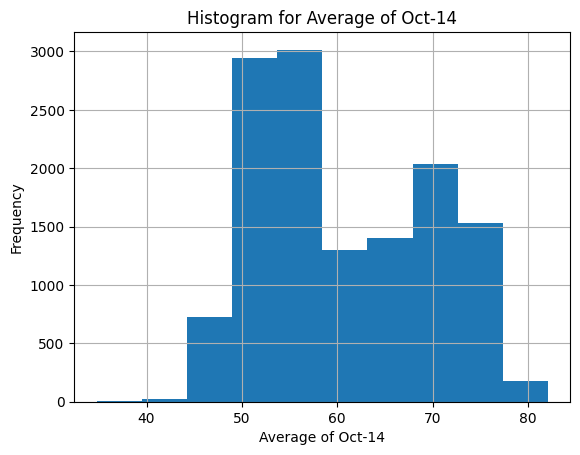

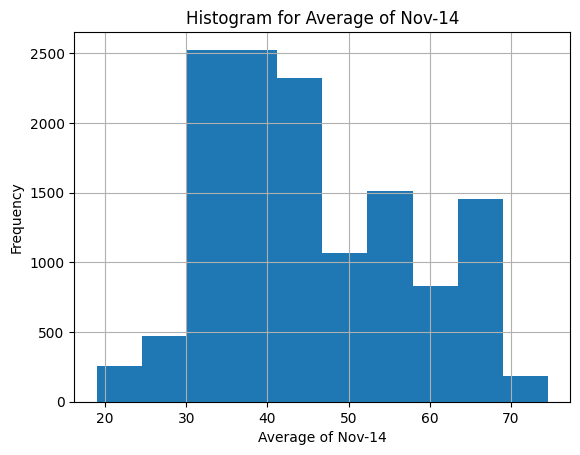

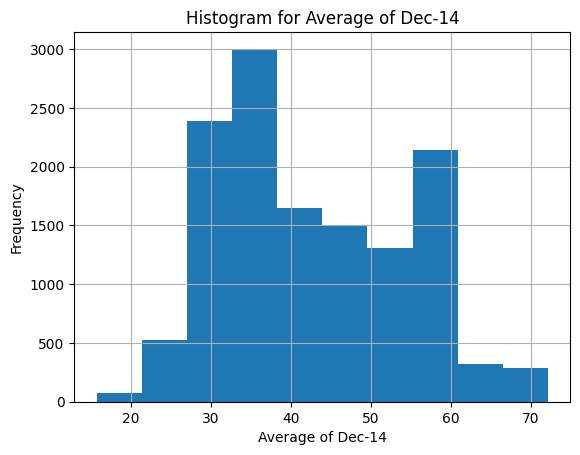

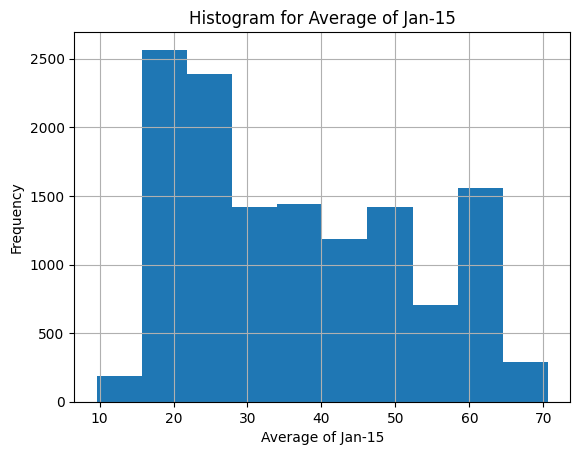

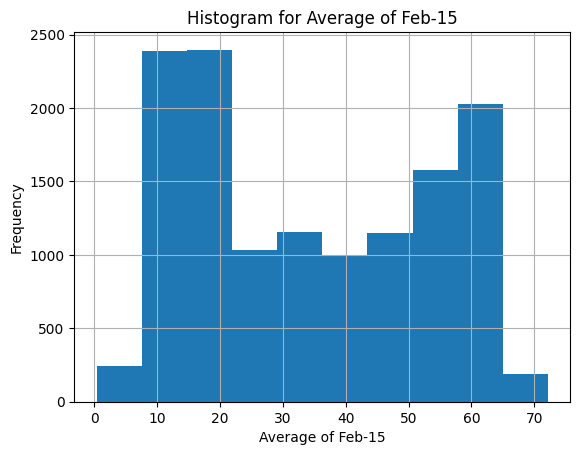

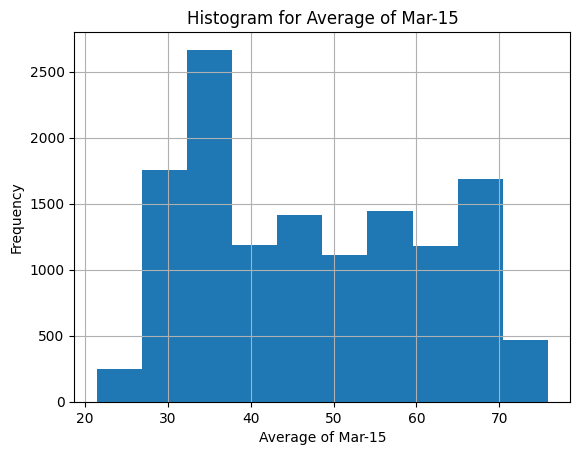

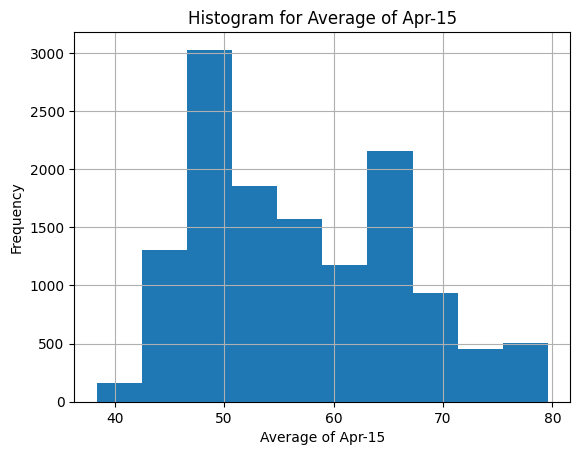

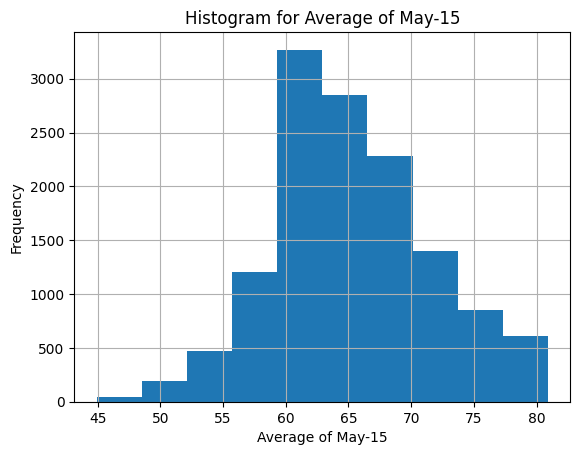

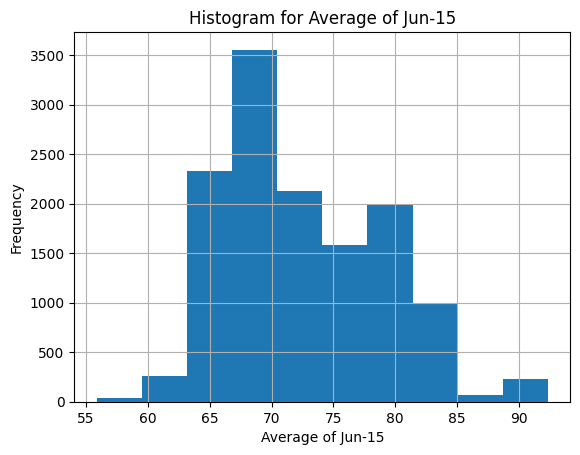

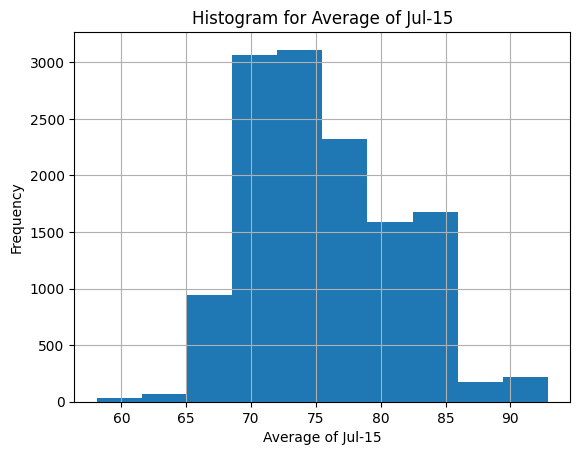

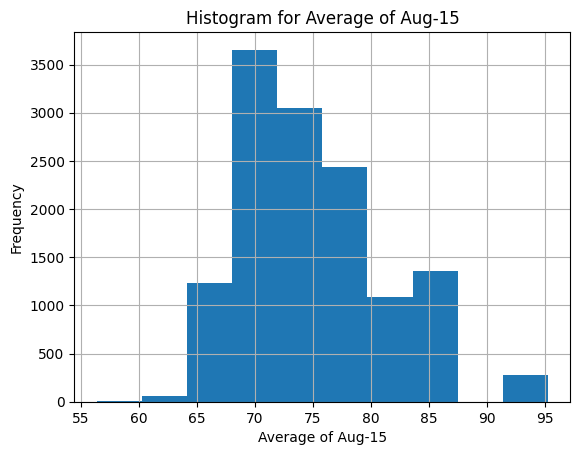

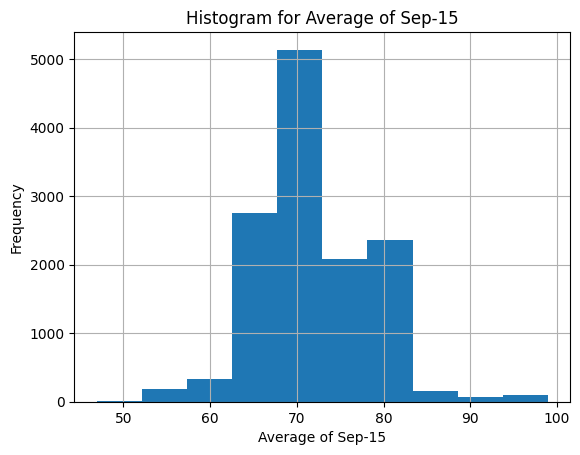

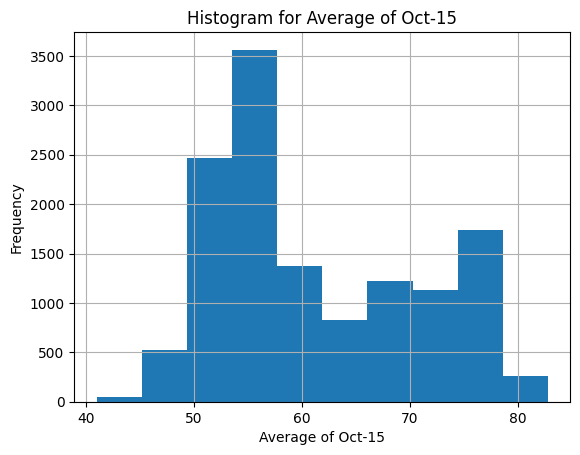

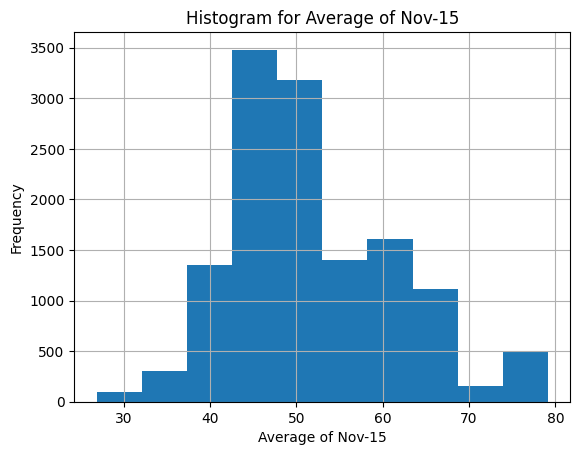

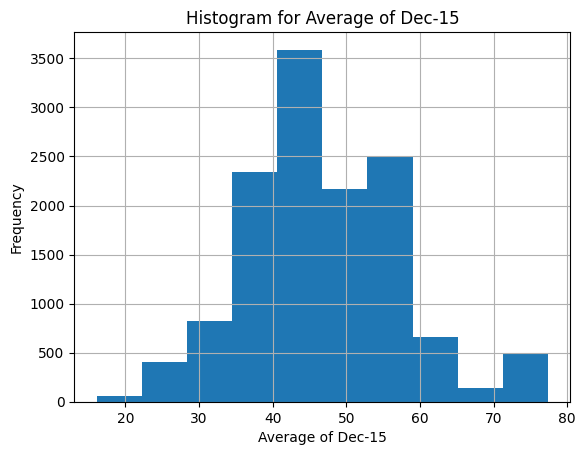

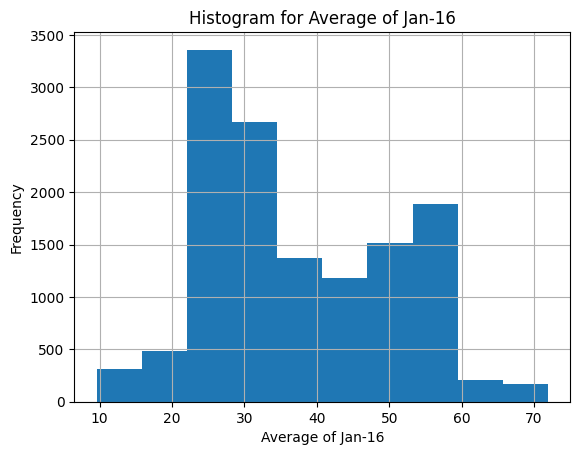

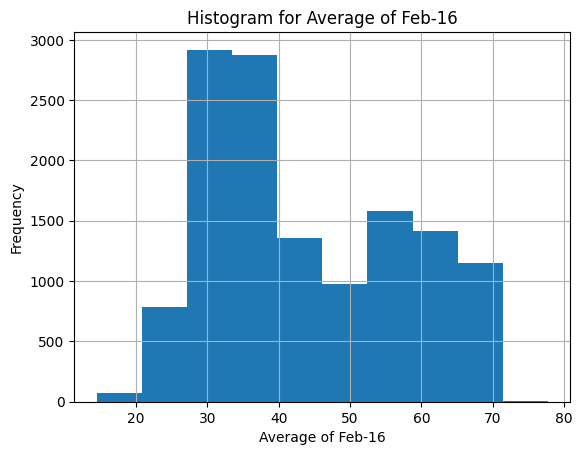

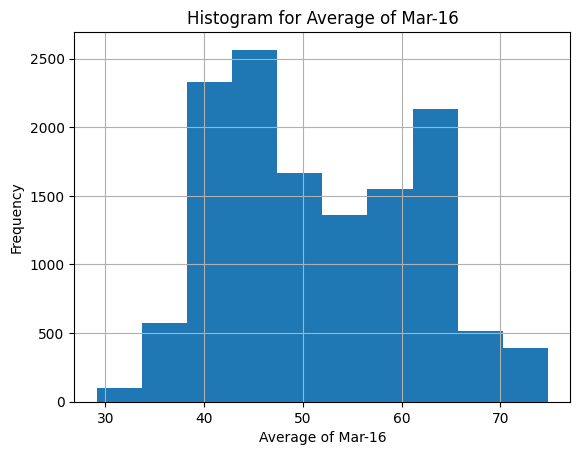

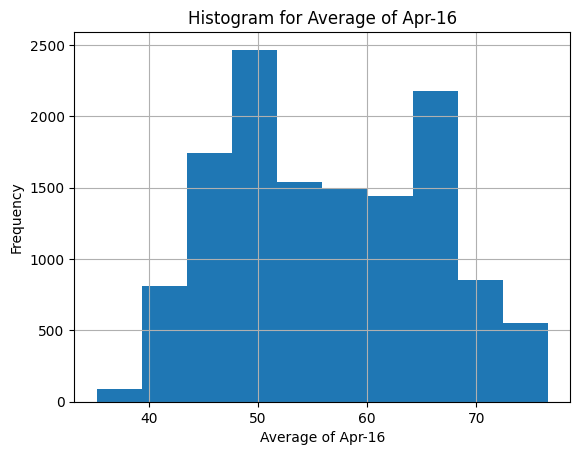

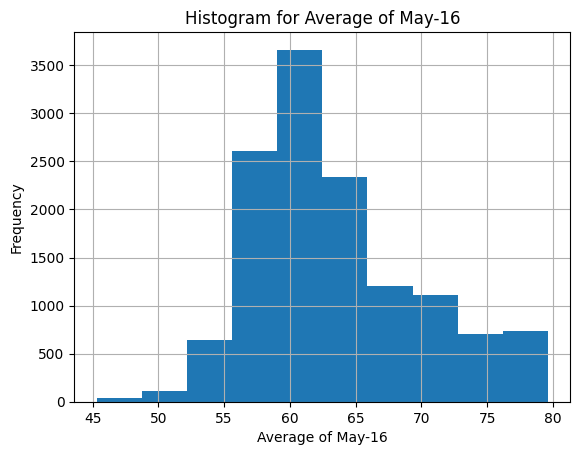

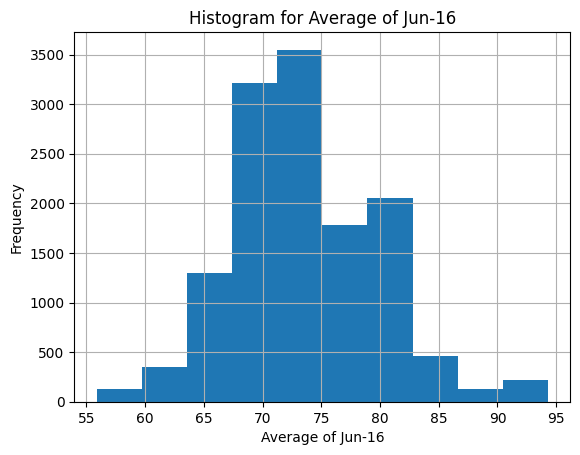

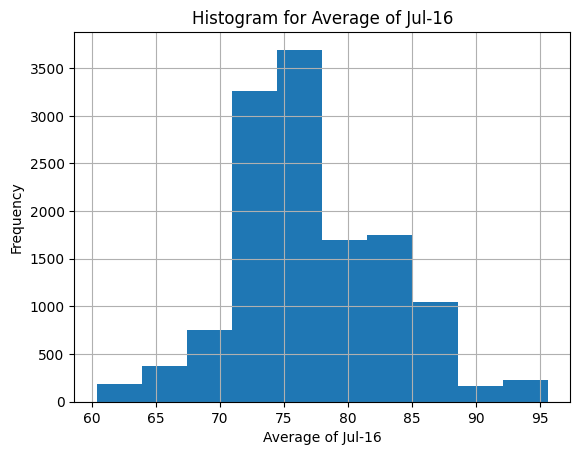

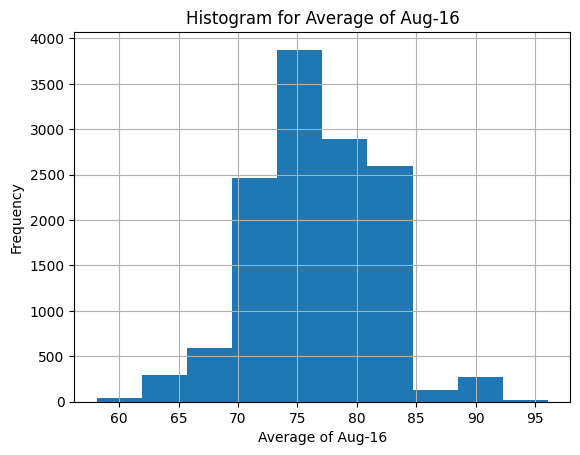

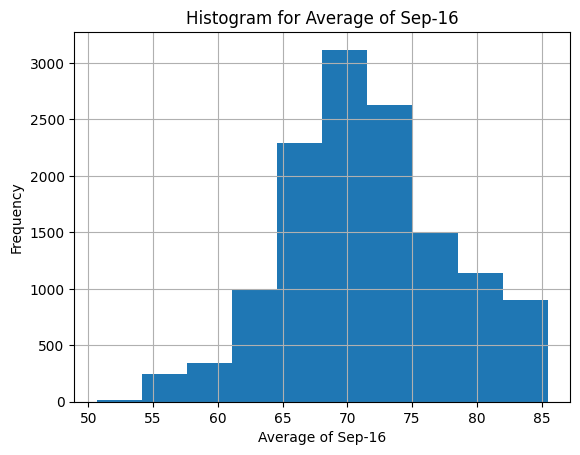

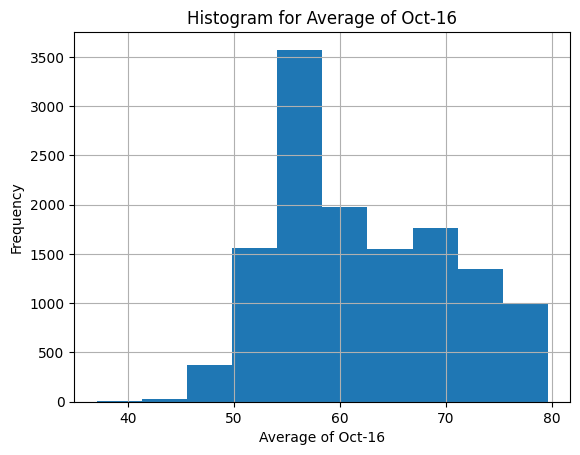

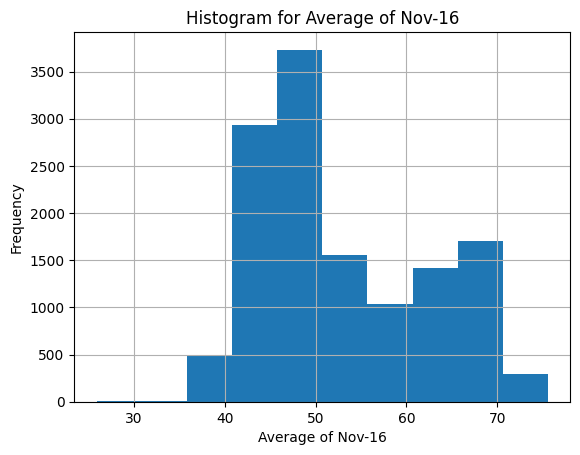

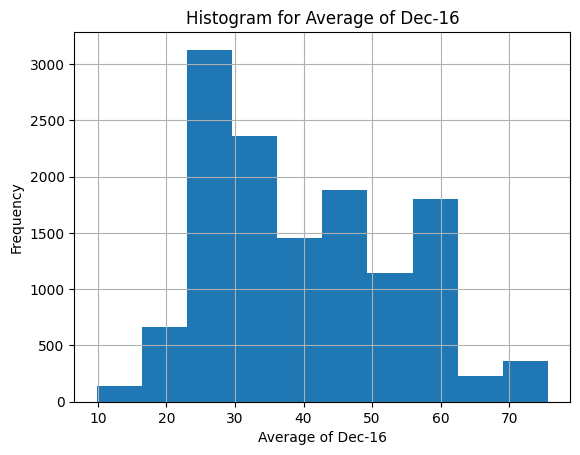

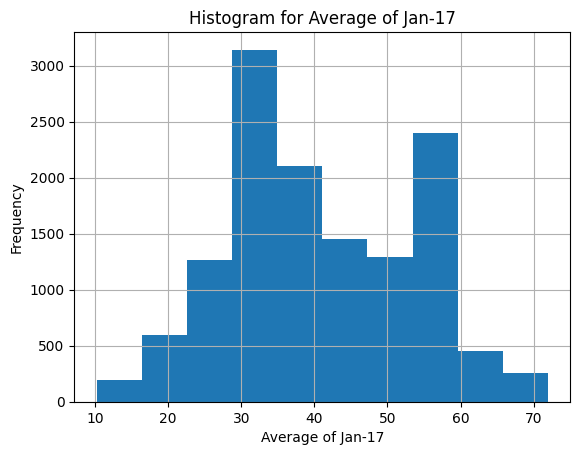

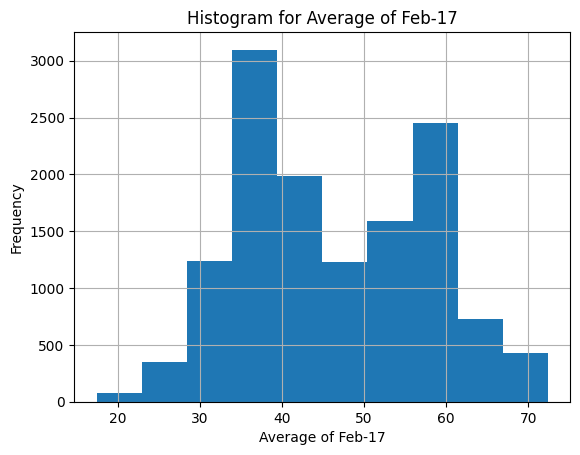

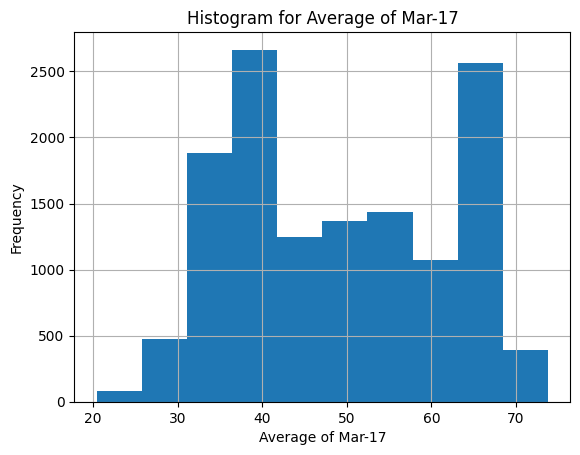

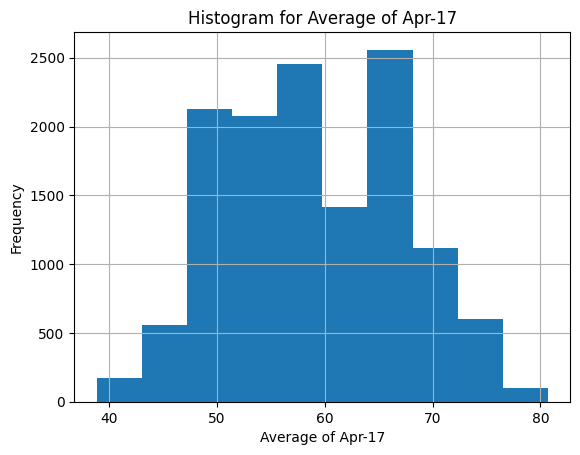

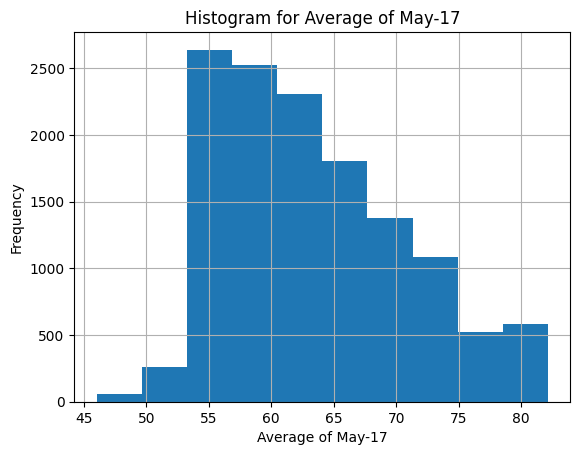

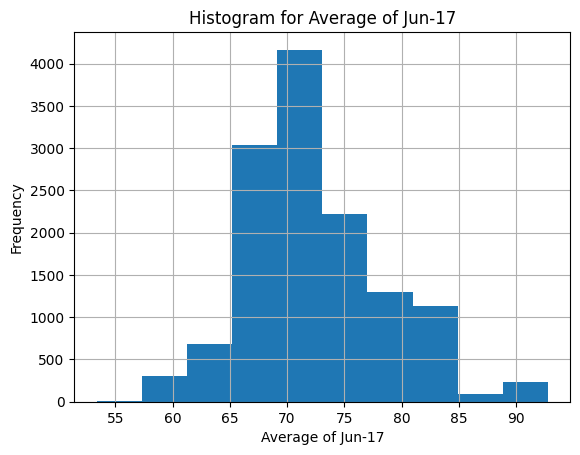

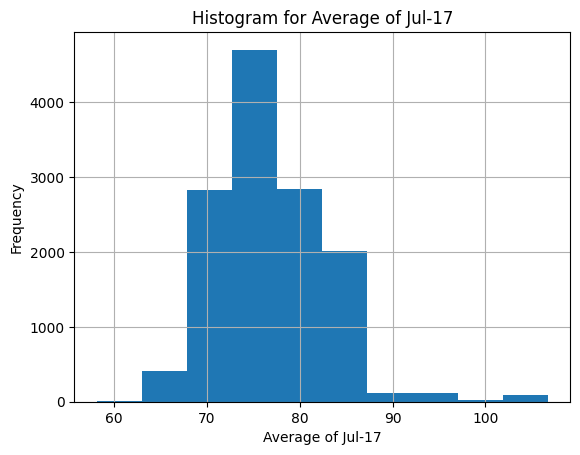

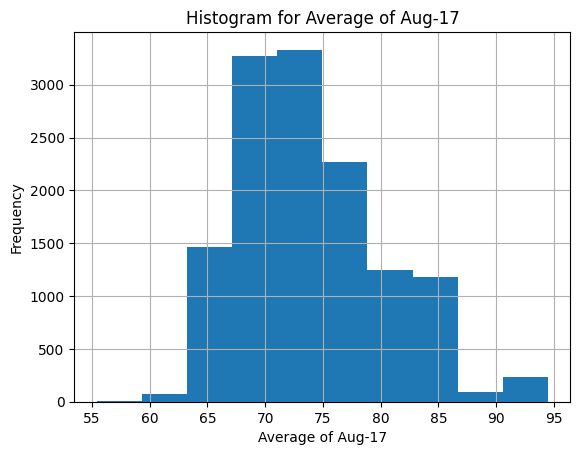

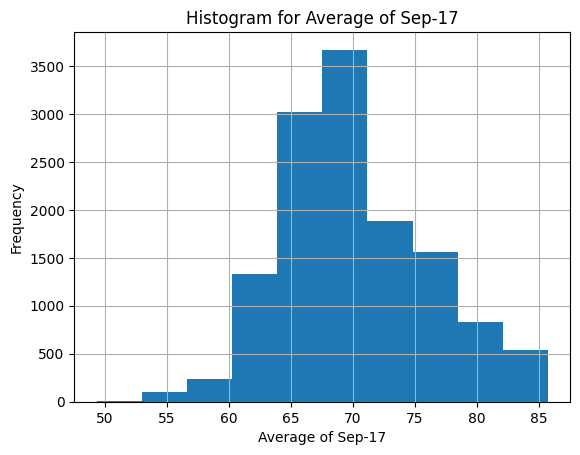

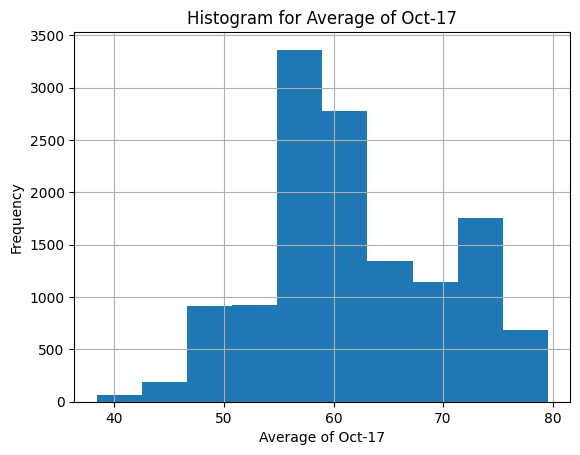

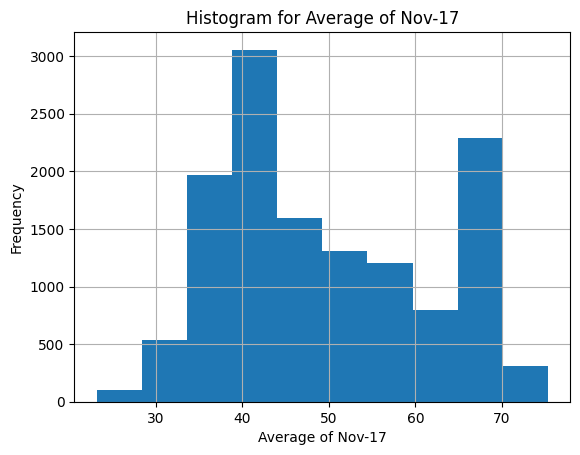

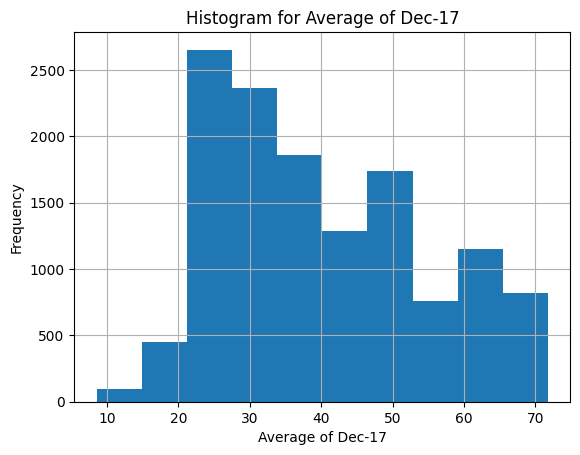

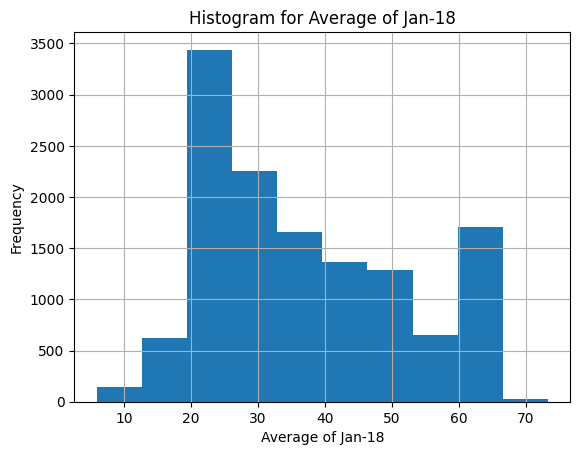

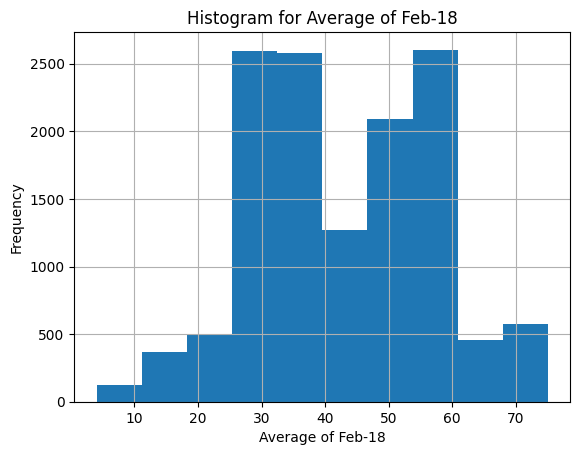

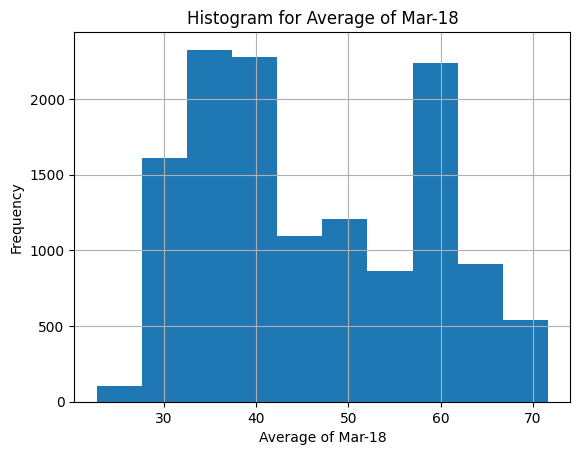

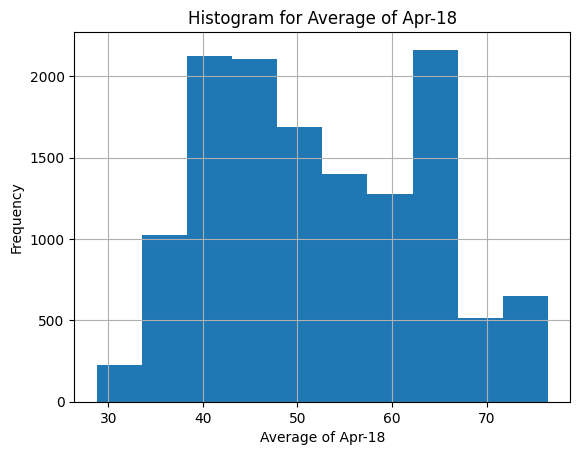

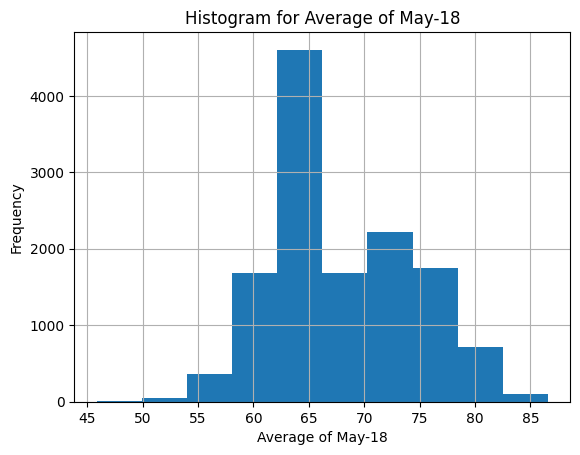

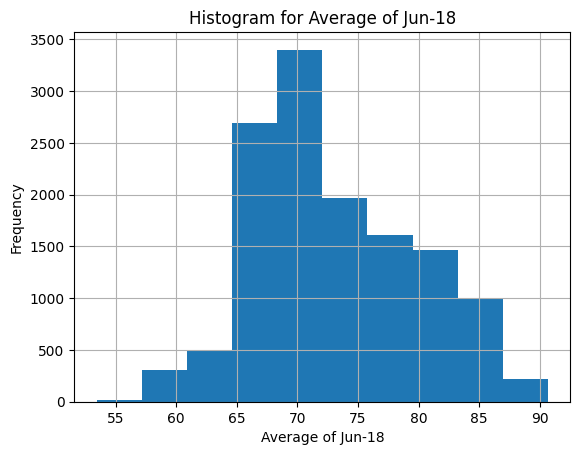

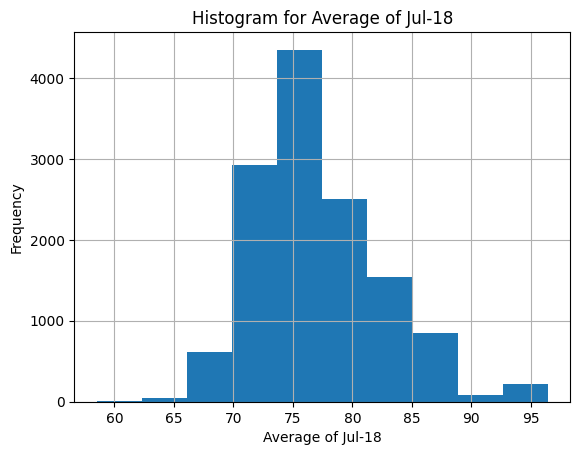

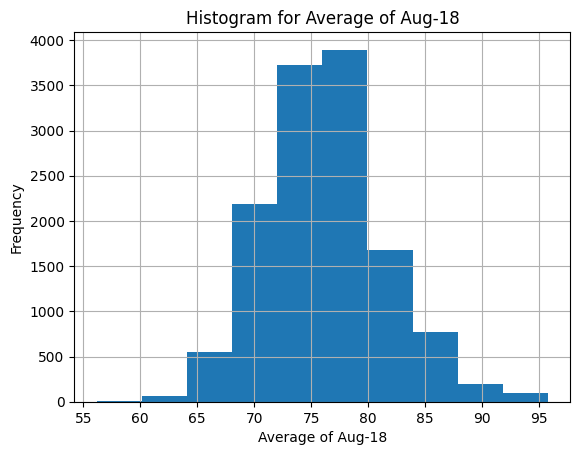

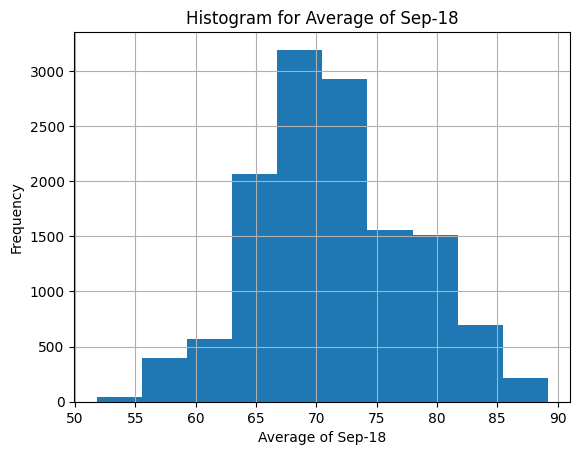

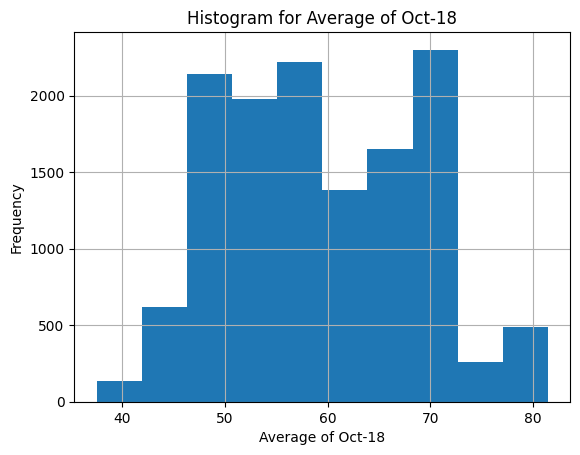

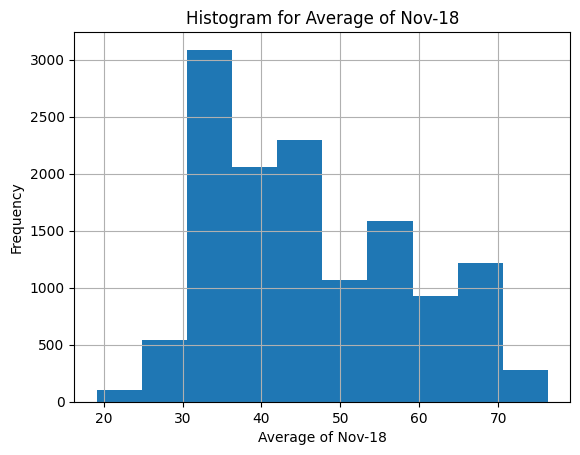

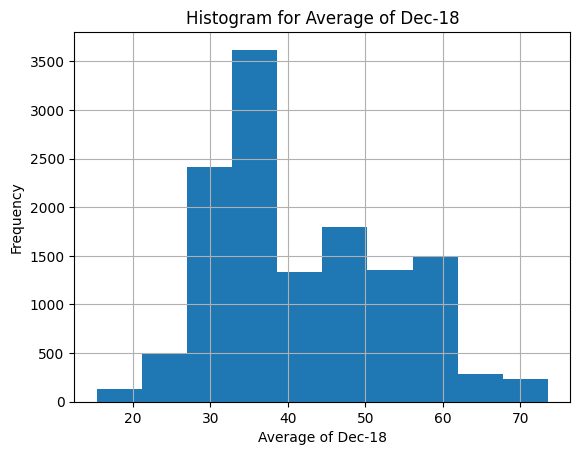

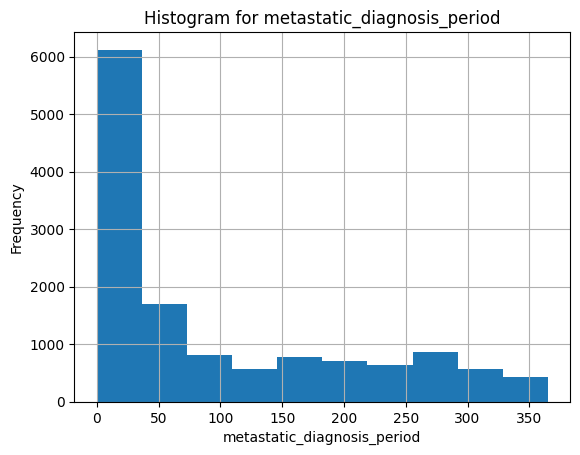

In [39]:
#Historgram Charts for numerical features

import matplotlib.pyplot as plt
numerical_columns = train.select_dtypes(include=["int64", "float64"]).columns

for column in numerical_columns:
  plt.figure()
  train[column].hist(bins=10)
  plt.title(f"Histogram for {column}")
  plt.xlabel(column)
  plt.ylabel("Frequency")
  plt.show()


In [46]:
#Impute missing values for all continuous numerical feature values from train dataset

# Import SimpleImputer from sklearn.preprocessing
from sklearn.impute import SimpleImputer

# Create a SimpleImputer object
imputer = SimpleImputer(strategy='mean')

# Impute missing values for all continuous numerical feature values from train dataset
train_continuous_features = train.select_dtypes(include=['int64', 'float64'])
imputer.fit(train_continuous_features)
train_continuous_features_imputed = imputer.transform(train_continuous_features)

# Replace the original continuous feature values with the imputed values
train[train_continuous_features.columns] = train_continuous_features_imputed
train

patient_id patient_race  payer_type patient_state  patient_zip3  \
0        268700.0          NaN  COMMERCIAL            AR         724.0   
1        484983.0        White         NaN            IL         629.0   
2        277055.0          NaN  COMMERCIAL            CA         925.0   
3        320055.0     Hispanic    MEDICAID            CA         900.0   
4        190386.0          NaN  COMMERCIAL            CA         934.0   
...           ...          ...         ...           ...           ...   
13168    588544.0     Hispanic    MEDICAID            PA         191.0   
13169    393047.0          NaN  COMMERCIAL            TX         757.0   
13170    790904.0          NaN  COMMERCIAL            CA         928.0   
13171    455518.0          NaN  COMMERCIAL            MI         481.0   
13172    379418.0     Hispanic    MEDICAID            CA         900.0   

          Region            Division  patient_age patient_gender        bmi  \
0          South  West South Central         39.0              F  29.168808   
1        Midwest  East North Central         55.0              F  35.360000   
2           West             Pacific         59.0              F  29.168808   
3           West             Pacific         59.0              F  29.168808   
4           West             Pacific         71.0              F  29.168808   
...          ...                 ...          ...            ...        ...   
13168  Northeast     Middle Atlantic         59.0              F  29.168808   
13169      South  West South Central         73.0              F  30.670000   
13170       West             Pacific         19.0              F  29.168808   
13171    Midwest  East North Central         52.0              F  29.168808   
13172       West             Pacific         63.0              F  29.168808   

      breast_cancer_diagnosis_code  \
0                           C50912   
1                           C50412   
2                             1749   
3                           C50911   
4                             1748   
...                            ...   
13168                       C50911   
13169                         1749   
13170                       C50819   
13171                         1742   
13172                       C50911   

                            breast_cancer_diagnosis_desc  \
0      Malignant neoplasm of unspecified site of left...   
1      Malig neoplasm of upper-outer quadrant of left...   
2      Malignant neoplasm of breast (female), unspeci...   
3      Malignant neoplasm of unsp site of right femal...   
4      Malignant neoplasm of other specified sites of...   
...                                                  ...   
13168  Malignant neoplasm of unsp site of right femal...   
13169  Malignant neoplasm of breast (female), unspeci...   
13170  Malignant neoplasm of ovrlp sites of unsp fema...   
13171  Malignant neoplasm of upper-inner quadrant of ...   
13172  Malignant neoplasm of unsp site of right femal...   

      metastatic_cancer_diagnosis_code metastatic_first_novel_treatment  \
0                                 C773                              NaN   
1                                 C773                              NaN   
2                                 C773                              NaN   
3                                 C773                              NaN   
4                                C7951                              NaN   
...                                ...                              ...   
13168                             C773                              NaN   
13169                            C7951                              NaN   
13170                             C799                              NaN   
13171                             C779                              NaN   
13172                             C787                              NaN   

      metastatic_first_novel_treatment_type  population  density  age_median  \
0         

In [51]:
from sklearn.decomposition import PCA

# Extract continuous numerical features from the train dataset
train_continuous_features = train.select_dtypes(include=['int64', 'float64'])

# Create a PCA object with the desired number of principal components
n_components = len(train_continuous_features.columns)  # Consider adjusting this value
pca = PCA(n_components=n_components)

# Fit the PCA object to the continuous feature data (**crucial step**)
pca.fit(train_continuous_features)

# Transform the continuous feature data using the fitted PCA object
train_continuous_features_pca = pca.transform(train_continuous_features)

# No padding needed after proper fitting
# Replace the original continuous feature values with the transformed values
train[train_continuous_features.columns] = train_continuous_features_pca


In [52]:
train ##After PCA 

patient_id patient_race  payer_type patient_state   patient_zip3  \
0      287246.601958          NaN  COMMERCIAL            AR -251373.188333   
1       70953.978354        White         NaN            IL -246714.445036   
2      278283.665749          NaN  COMMERCIAL            CA   56399.928701   
3      234283.540249     Hispanic    MEDICAID            CA  535796.055923   
4      364498.534538          NaN  COMMERCIAL            CA  265867.697177   
...              ...          ...         ...           ...            ...   
13168  -32877.989260     Hispanic    MEDICAID            PA -104085.496520   
13169  162777.948529          NaN  COMMERCIAL            TX -189663.569688   
13170 -236154.202565          NaN  COMMERCIAL            CA  341351.061074   
13171  100173.461583          NaN  COMMERCIAL            MI -118590.313358   
13172  174920.682294     Hispanic    MEDICAID            CA  535674.593877   

          Region            Division   patient_age patient_gender  \
0          South  West South Central -12914.660886              F   
1        Midwest  East North Central  -4960.957598              F   
2           West             Pacific  -5128.537773              F   
3           West             Pacific -35600.126024              F   
4           West             Pacific  -3733.556421              F   
...          ...                 ...           ...            ...   
13168  Northeast     Middle Atlantic  -9576.456813              F   
13169      South  West South Central  -2345.797945              F   
13170       West             Pacific   4819.988212              F   
13171    Midwest  East North Central   7571.921113              F   
13172       West             Pacific -35604.190483              F   

                bmi breast_cancer_diagnosis_code  \
0      14461.750501                       C50912   
1      13117.315217                       C50412   
2     -14256.581662                         1749   
3      13081.530671                       C50911   
4      19058.456191                         1748   
...             ...                          ...   
13168 -14176.217149                       C50911   
13169   7152.350850                         1749   
13170  -9156.545346                       C50819   
13171  -9538.601993                         1742   
13172  13036.088474                       C50911   

                            breast_cancer_diagnosis_desc  \
0      Malignant neoplasm of unspecified site of left...   
1      Malig neoplasm of upper-outer quadrant of left...   
2      Malignant neoplasm of breast (female), unspeci...   
3      Malignant neoplasm of unsp site of right femal...   
4      Malignant neoplasm of other specified sites of...   
...                                                  ...   
13168  Malignant neoplasm of unsp site of right femal...   
13169  Malignant neoplasm of breast (female), unspeci...   
13170  Malignant neoplasm of ovrlp sites of unsp fema...   
13171  Malignant neoplasm of upper-inner quadrant of ...   
13172  Malignant neoplasm of unsp site of right femal...   

      metastatic_cancer_diagnosis_code metastatic_first_novel_treatment  \
0                                 C773                              NaN   
1                                 C773                              NaN   
2                                 C773                              NaN   
3                                 C773                              NaN   
4                                C7951                              NaN   
...                                ...                              ...   
13168                             C773                              NaN   
13169                            C7951                              NaN   
13170                             C799                              NaN   
13171                             C779                              NaN   
13172                             C787                              NaN  

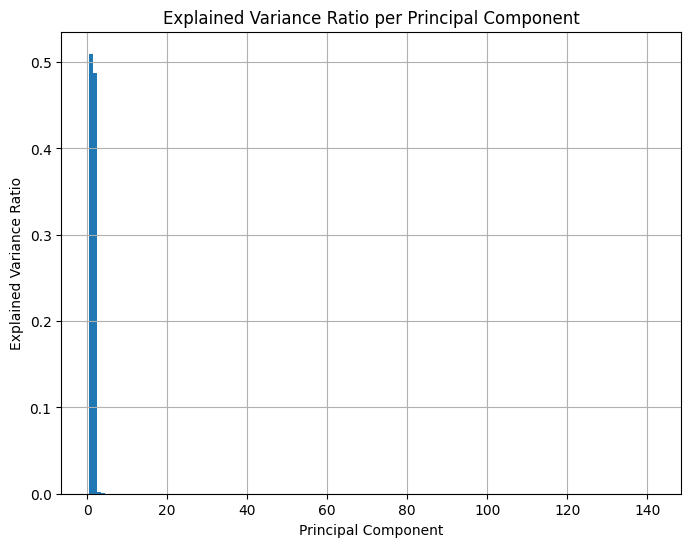

In [53]:
import matplotlib.pyplot as plt

# Get the number of components - TO DO ( VARIATION )
n_components = len(pca.explained_variance_ratio_)

# Create a bar chart of explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, n_components + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component')
plt.grid(True)
plt.show()


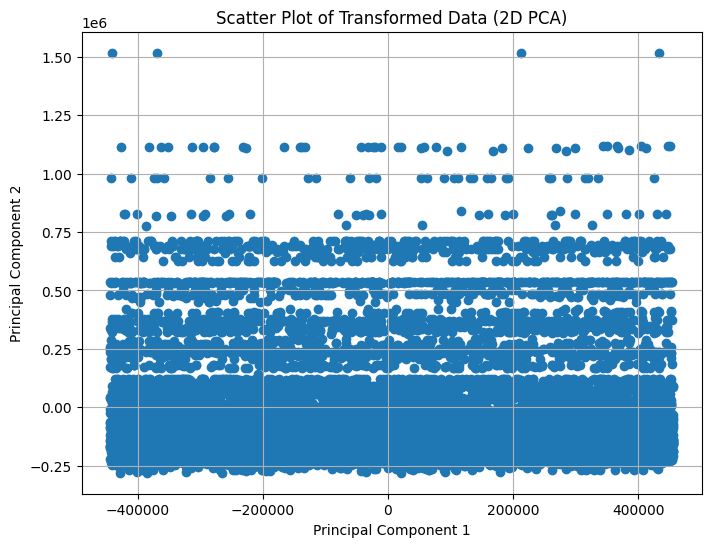

In [54]:
import matplotlib.pyplot as plt

# Select the first two principal components
pca_data_2d = train_continuous_features_pca[:, :2]  # Select first two columns for 2D plot

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(pca_data_2d[:, 0], pca_data_2d[:, 1])  # Assuming first column is PC1, second is PC2
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Transformed Data (2D PCA)')
plt.grid(True)
plt.show()


In [ ]:
#### TO DO

## IDENTIFY THE CORRECT NUMBER OF COMPONENTS : Information Loss vs Model Complexity, ELbow point analysis
## MORE VISUALIZATION ON VARIANCE RATIO
## IDENTIFY HOW THIS CAN BE USED AS FEATURES FOR A REGRESSION MODEL